# **Final Submission**


### **Context:**

 - Nowadays there is a huge demand for used cars in the Indian market. As new car sales have slowed in the recent past, the used car market has continued to grow in recent years and is now larger than the new car market. The used car market has great uncertainties in terms of prices and supply. There are several factors, including mileage, make, model, year, etc., that can influence the true value of a car. Therefore, from a seller's perspective, it is not an easy task to set the correct price for a used car.
 ### **The objective:**

 - Create a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.
 ### **The key questions:**

- What features are relevant in a pricing model that can predict the price of used cars?
### **The problem formulation**:

- We are trying to improve the profit of seller of used car market.

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

# **Milestone 1** 

### **Loading libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [3]:
cars = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [25]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [26]:
cars.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:**
- There are 7252 rows and 14 columns. Its possible to see that there is missin values in **New_Price** column. There are 9 númeric columns and 5 objects columns.

### **Let us check the data types and and missing values of each column** 

In [27]:
# Check the datatypes of each column. Hint: Use info() method
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [28]:
# Check total number of missing values of each column. Hint: Use isnull() method
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.
The variable with few missing data are `Mileage`, ,`Seats` and `Engine` with 2, 46 and 53 missing values, equal to **0.02%**, **0.63%** and **0.73%** of total data respectively. The `Power`variable has more level of missing data with **2.41%** of total data, equivalent to 175 missing values. There are 2 variable with a high amount of missing data: `New_Price` and `Price` with a **86.12%** and **17.01%** of total data.

In [4]:
# Remove S.No. column from data. Hint: Use inplace = True
cars.drop(columns={"S.No."}, inplace=True)
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [34]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
cars.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights: **
- The `Year` register of used cars has a range beetwen **1996 to 2019**, with a few tendence to a left skewed distribution.
- Its seems to be outliers in `Kilometers_Driven` because there is a very high value. It has a mean of **58699** kilometres driven.
- The `Engine` and `Power` seems to haves a right skewed distribution with outliers on their upper side.
- `Seats` seems to have an uniform distribution with **5 seats**. There are some outliers that increase the mean to 5.28 seats.
- `New_Price` and `Price` has an right skrewed distribution. The range for `New_Price` is beetwen **3.91 to 375** and for `Price` is beetwen **0.44 and 160**.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [35]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
cars.describe(include = ['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [36]:
cat_cols = cars.select_dtypes(include = ['object']).columns
cat_cols

for column in cat_cols:
    
    print("For column:", column)
    
    print(cars[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


In [37]:
cars['Location'].value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [38]:
cars['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [39]:
cars['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [40]:
cars['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

#### **Observations and Insights:**
- There is a big number of different vehicle marks and model (**2041 different values**).
- The data recopiled correspond to **11 different location** from India.
- There are **5 types** of fuel: Diesel, Petrol, CNG, LPG and Electric. The first two concentrate the **98.95%** of total data.
- There are only **2 types of transmission**: Manual and Automatic. There are more amount of manual vehicles than automatic vehicle.
- **Most of the sellers** correspond to **first owners** of the vehicles.

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

Boxplot de Kilometros recorridos:


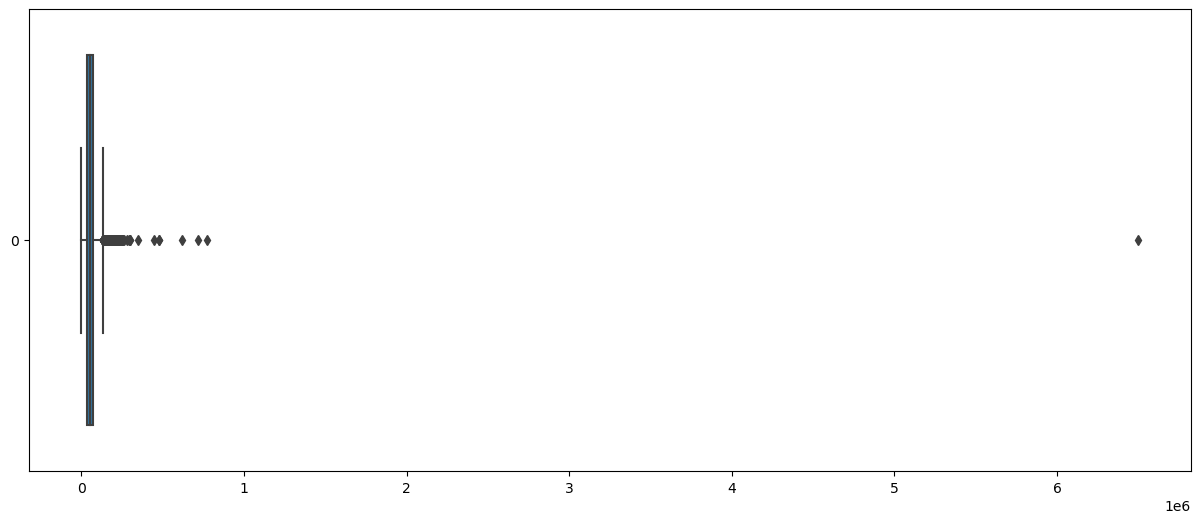

count       7253.0
mean       58699.1
std        84427.7
min          171.0
25%        34000.0
50%        53416.0
75%        73000.0
max      6500000.0
Name: Kilometers_Driven, dtype: float64

In [47]:
# cars['Owner_Type'].value_counts()
Km_Driven = list(cars.Kilometers_Driven)
cars.Kilometers_Driven.describe()
print('Boxplot de Kilometros recorridos:')
fig = plt.figure(figsize=(15,6))
plot = sns.boxplot(data=cars["Kilometers_Driven"],orient="h")
plt.show()
cars.Kilometers_Driven.describe().round(1)


**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [48]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
cars.sort_values('Kilometers_Driven', ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:**


In the first row, a car manufactured as recently as 2017 having been driven **6500000 km is almost impossible**. It can be considered as data entry error and so we can remove this value/entry from data.

In [5]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
cars.drop(2328, inplace=True)

In [6]:
cars.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,NaN


**Check Mileage extreme values**

In [51]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
cars.sort_values('Mileage').head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [7]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

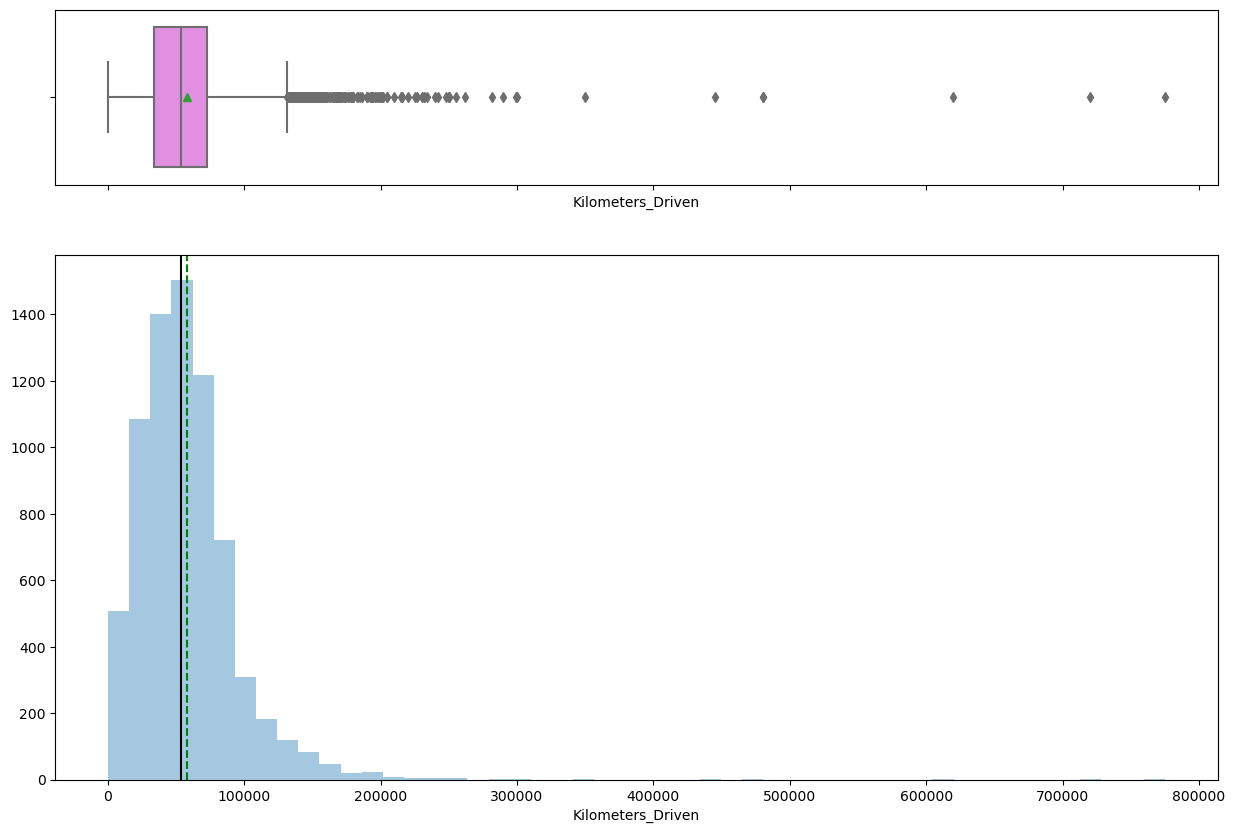

In [57]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(cars['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

**The effects of skewed data degrades the model’s ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values.** In example, the right skewed data will predict better on data points with lower value as compared to those with higher values.

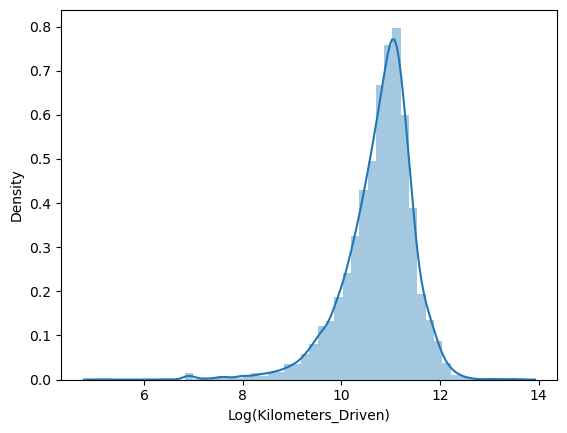

In [58]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(cars["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: **
- The transformation to log makes the variable more similar to a normal distribution, so its good for use in prediction problems

In [8]:
# We can add a transformed kilometers_driven feature in data
cars["kilometers_driven_log"] = np.log(cars["Kilometers_Driven"])
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246


**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

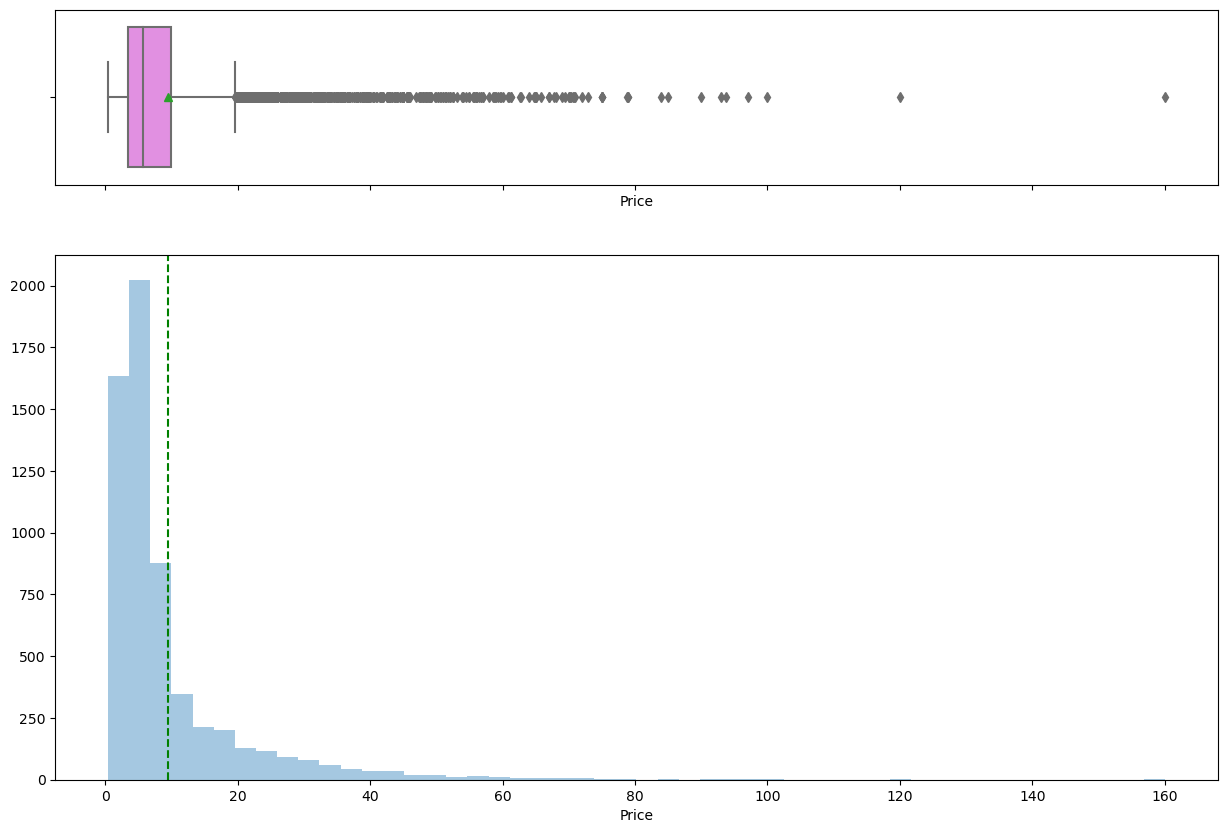

In [24]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(cars['Price'])

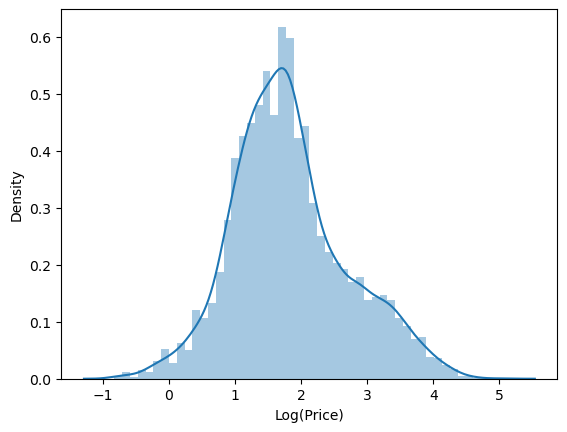

In [25]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(cars["Price"]), axlabel = "Log(Price)");

In [9]:
# We can Add a transformed Price feature in data
cars['Price_log'] = np.log(cars['Price'])
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822


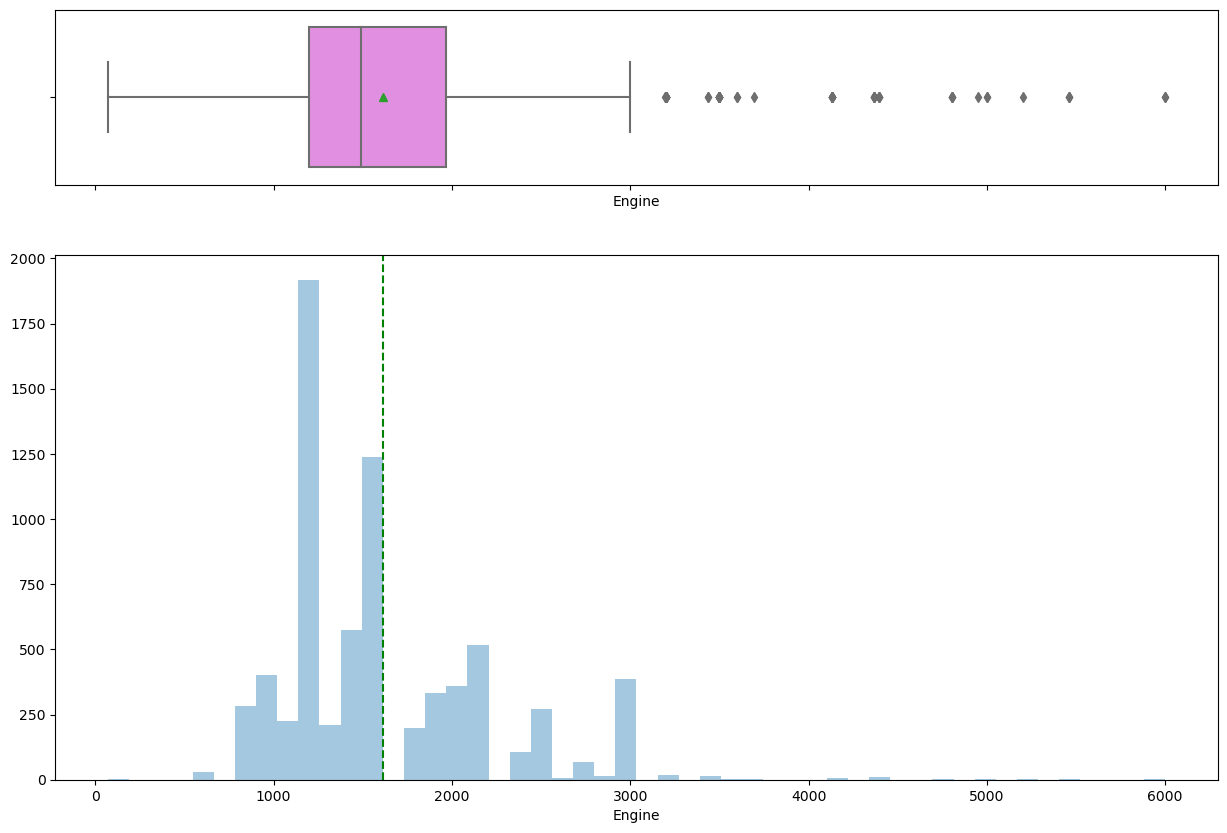

In [27]:
histogram_boxplot(cars['Engine'])

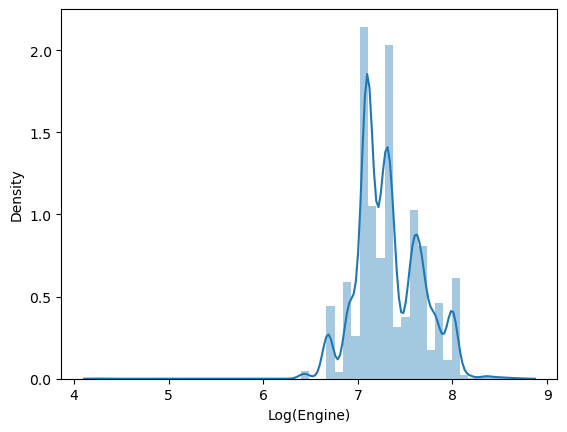

In [61]:
# Log transformation of the feature 'Engine'
sns.distplot(np.log(cars["Engine"]), axlabel = "Log(Engine)");

In [10]:
# We can Add a transformed Engine feature in data
cars['Engine_log'] = np.log(cars['Engine'])
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,6.905753
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,7.366445
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,7.089243
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,7.129298
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,7.584773


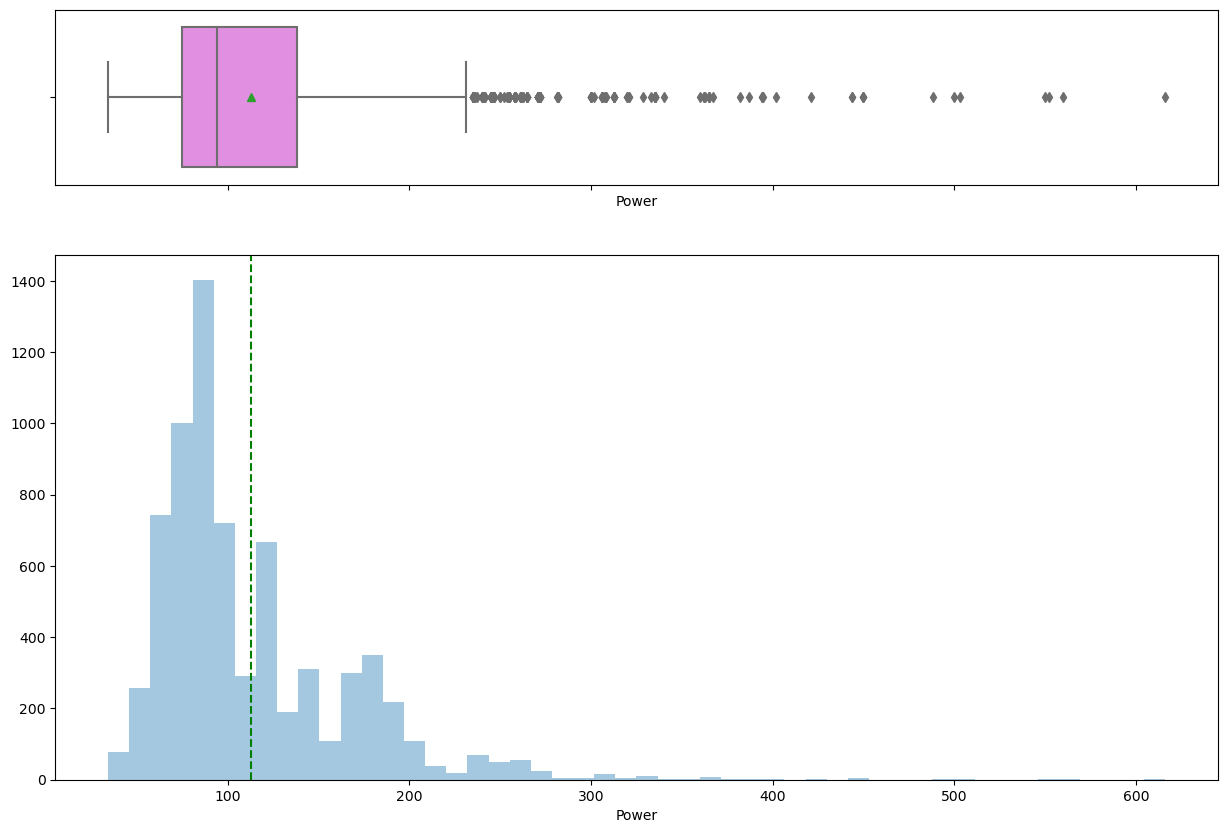

In [63]:
histogram_boxplot(cars['Power'])

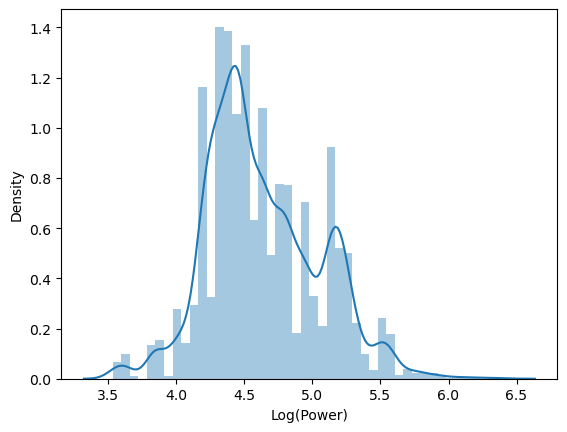

In [64]:
# Log transformation of the feature 'Power'
sns.distplot(np.log(cars["Power"]), axlabel = "Log(Power)");

In [11]:
# We can Add a transformed Power feature in data
cars['Power_log'] = np.log(cars['Power'])
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,6.905753,4.063198
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,7.366445,4.837868
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,7.089243,4.485260
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,7.129298,4.485936
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,7.584773,4.947340


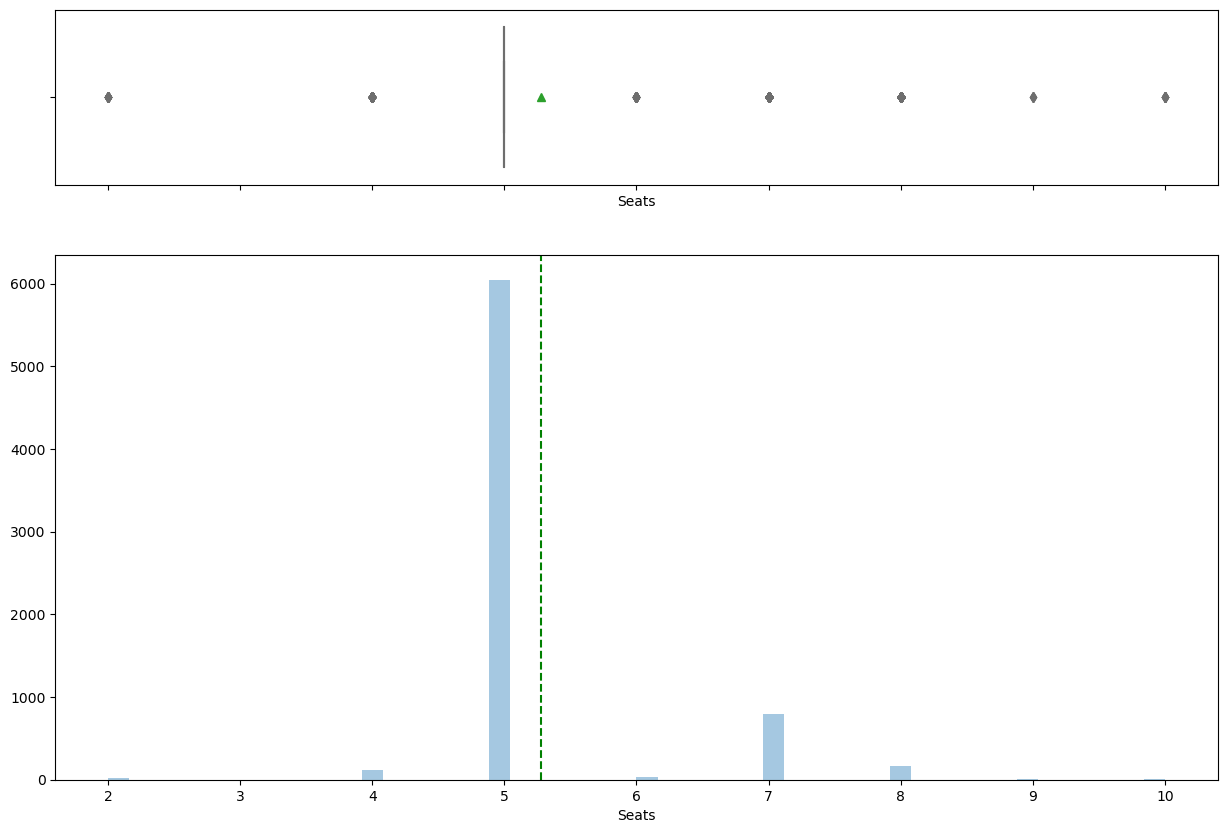

In [66]:
histogram_boxplot(cars['Seats'])

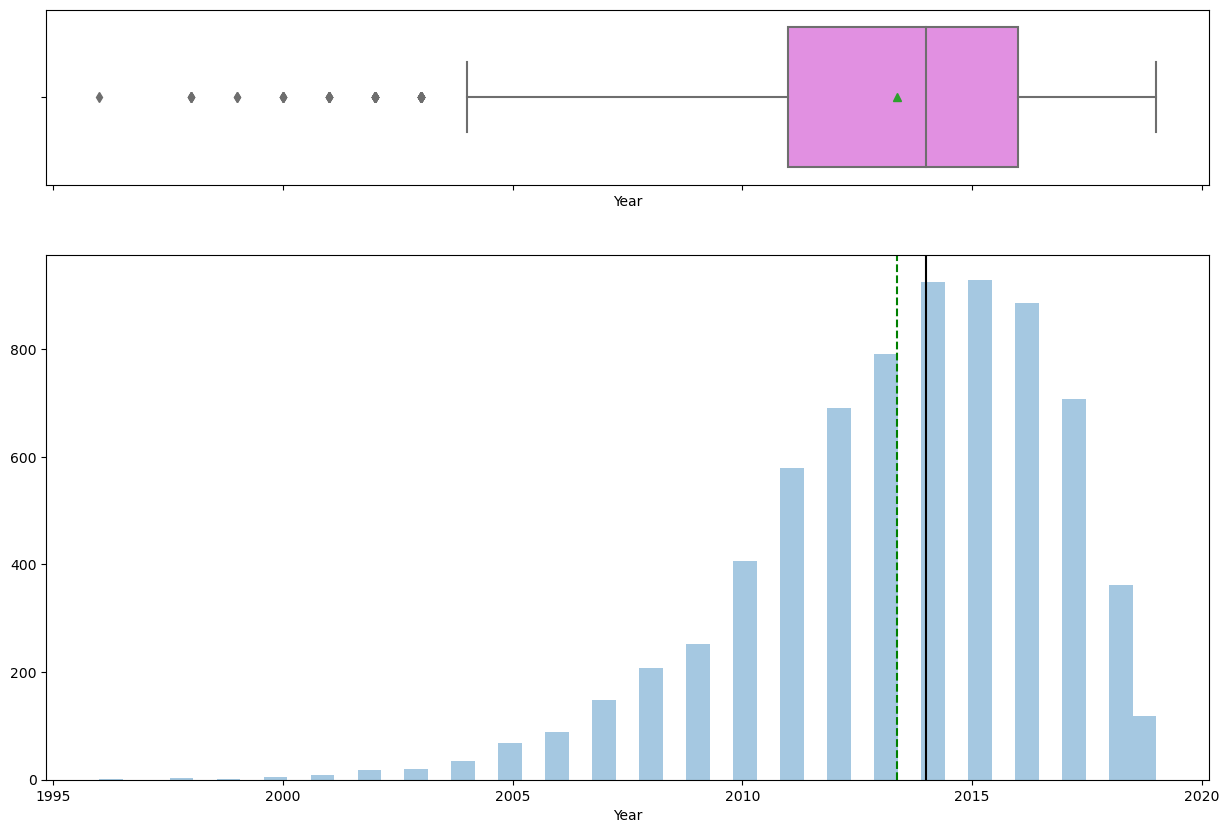

In [67]:
histogram_boxplot(cars['Year'])

<AxesSubplot:xlabel='Log(Year)', ylabel='Density'>

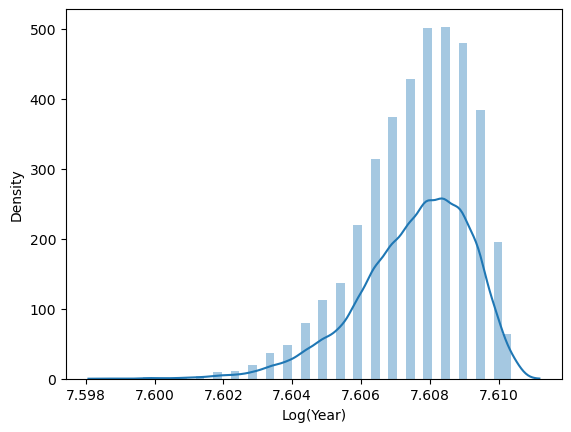

In [31]:
sns.distplot(np.log(cars["Year"]), axlabel = "Log(Year)")

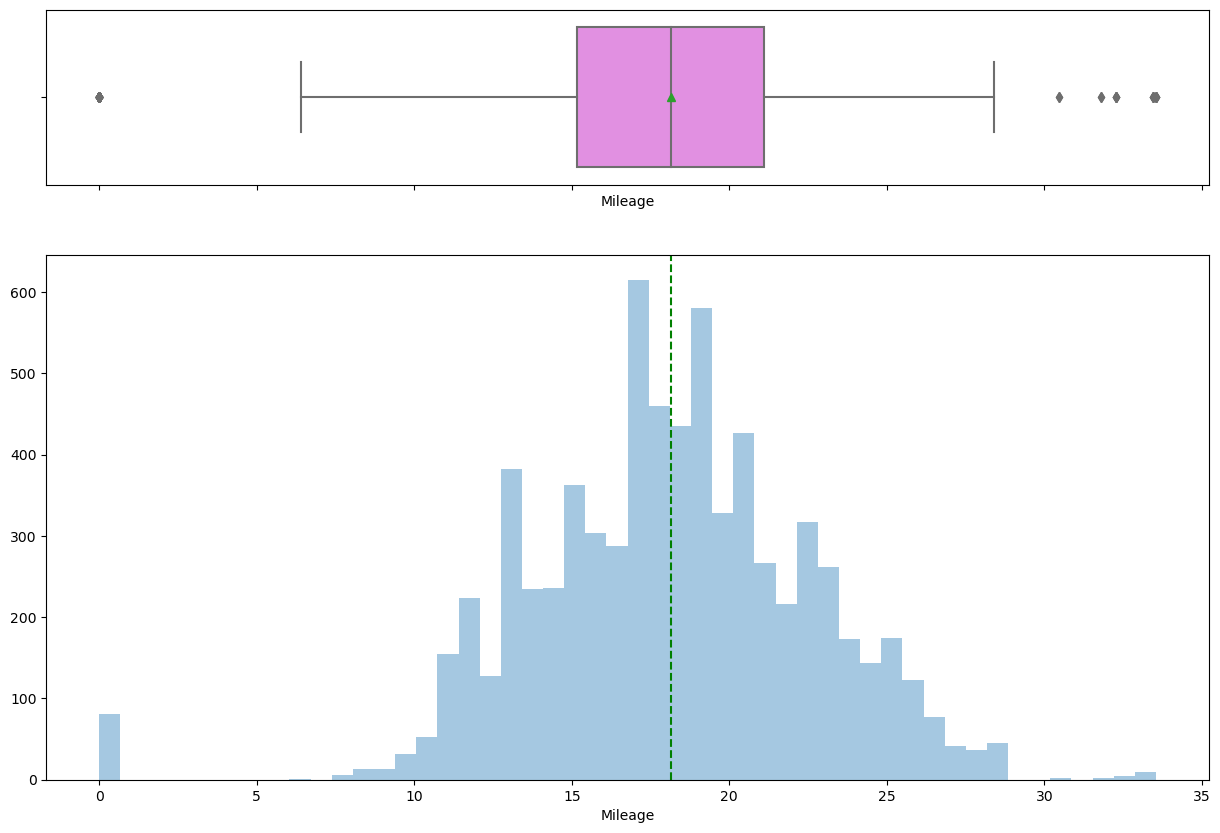

In [107]:
histogram_boxplot(cars['Mileage'])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

**Observations and Insights for all the plots:**

- The **log(Price)** and **log(Kilometers_Driven)** show a normal distribution, thats better for a predict model to outlier values.
- The **Engine** and **Power** has a trend to has a right skrewed distribution, but their really have multi-mode distribution. For modelling will be used **Log(Engine)** and **log(Power)**.
- The number of **Seats** has a very clear mode equal to 5 seats, and a range between 2 to 10 seats.
- The **Year** doesnt show an improve with log(Year), taking the same distribution with o without function log().


## **2. Univariate analysis - Categorical Data**

In [12]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(cars[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(cars[z], palette = 'Paired', order = cars[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

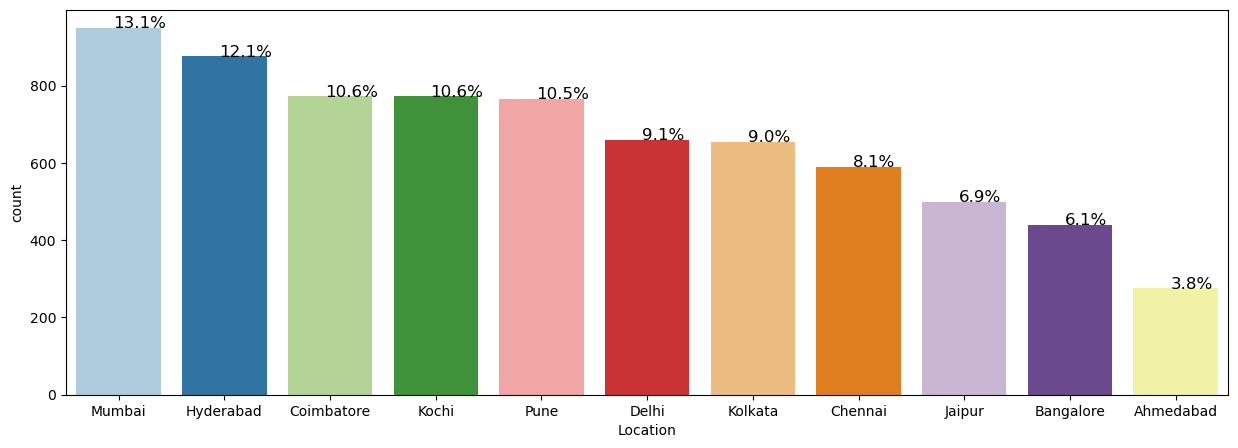

In [69]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

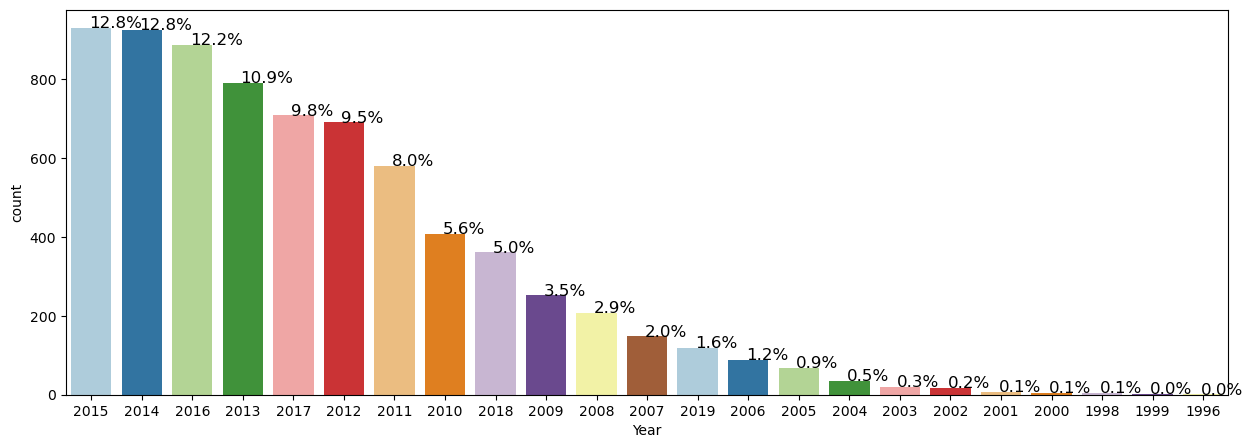

In [70]:
perc_on_bar('Year')

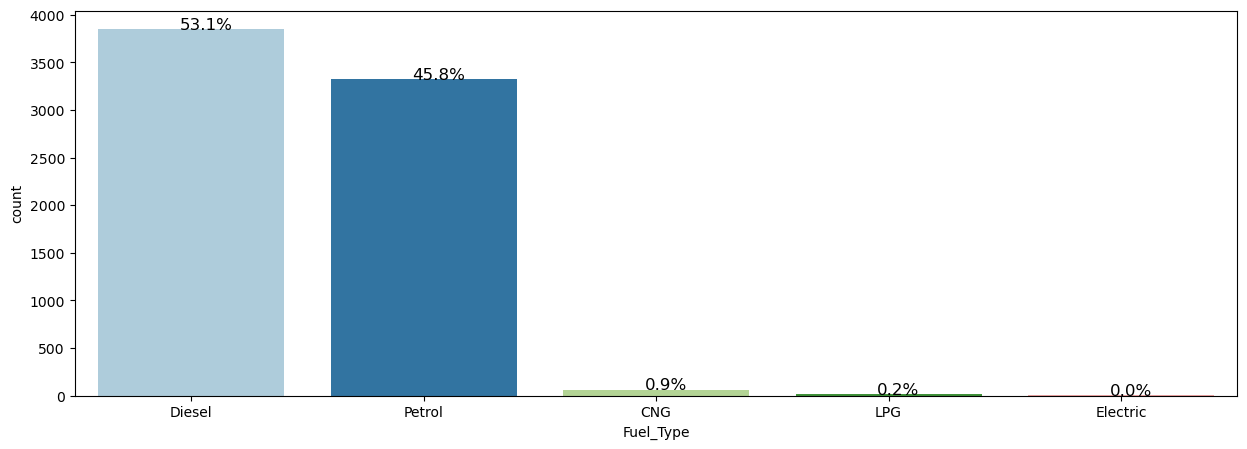

In [71]:
perc_on_bar('Fuel_Type')

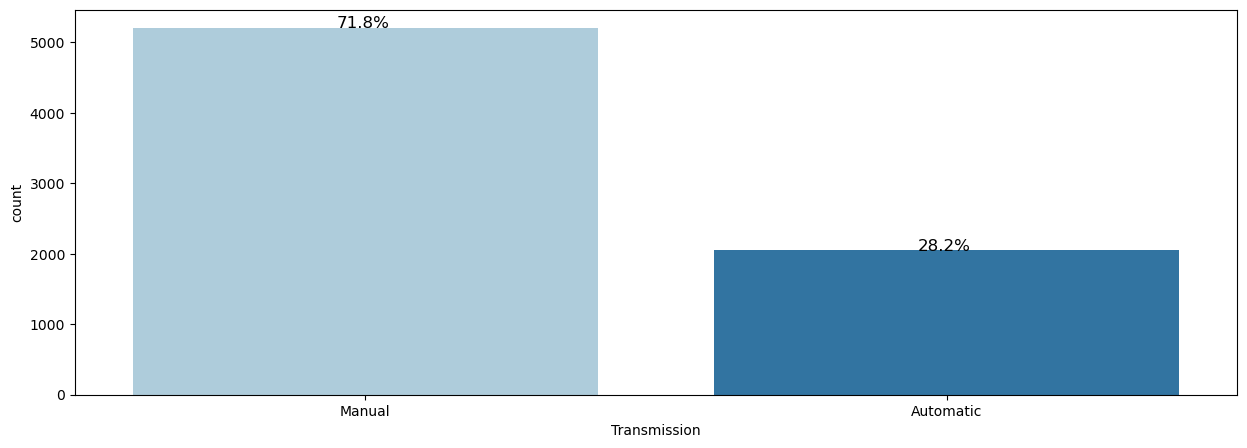

In [72]:
perc_on_bar('Transmission')

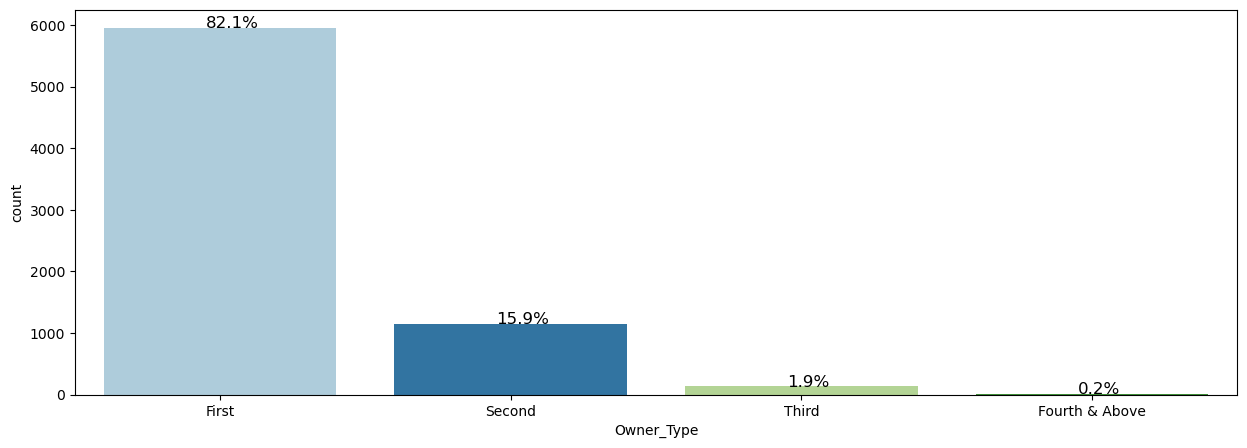

In [73]:
perc_on_bar('Owner_Type')

**Observations and Insights from all plots:**
- This analysis has been writen in **Summary Statistics of Categorical Variables**:
    - There is a big number of different vehicle marks and model (**2041 different values**). So its difficult to identify any trend with the data as found.
    - The data recopiled correspond to **11 different location** from India. There is a heteregenous distribution beetwen data "Location", without concentration in any category. Its look like a uniform distribution but there are some "Location" with fewer values than other.
    - There are **5 types** of fuel: Diesel, Petrol, CNG, LPG and Electric. The first two concentrate the **98.95%** of total data.
    - There are only **2 types of transmission**: Manual and Automatic. There are more amount of manual vehicles than automatic vehicle.
    - **Most of the sellers** correspond to **first owners** of the vehicles with a 82.1% of total.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


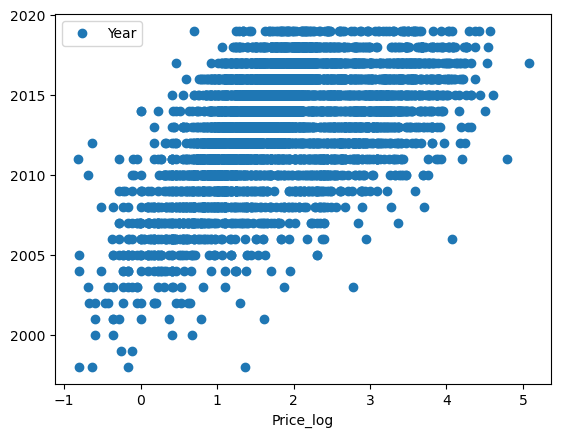

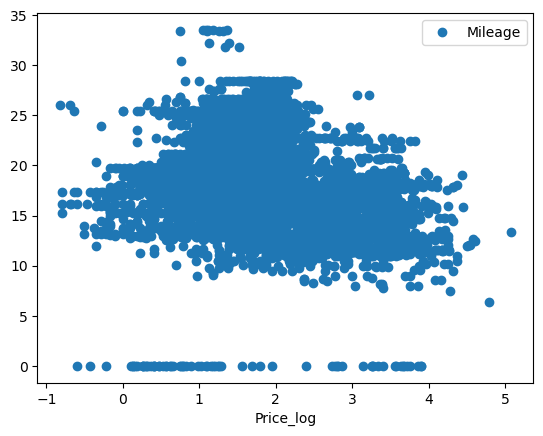

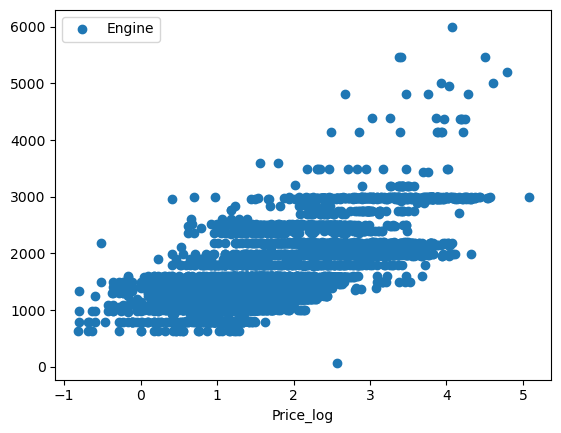

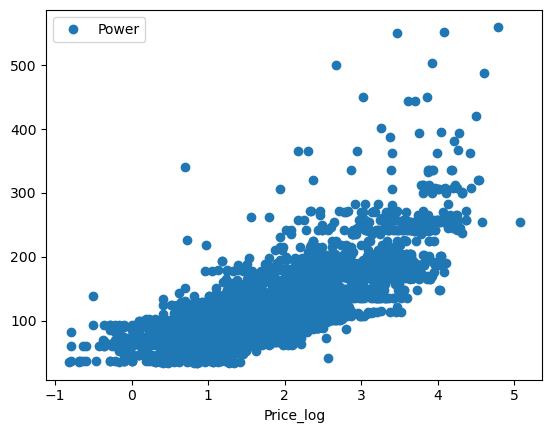

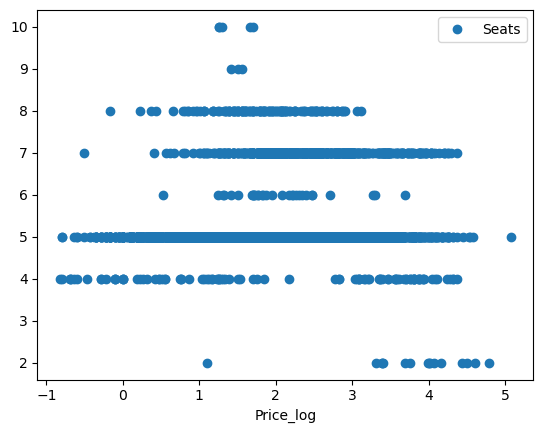

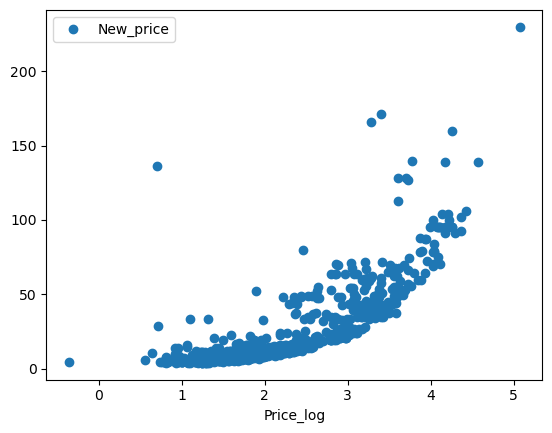

In [97]:
# Let us plot pair plot for the variables 'year' and 'price_log'
print(cars.plot(x = 'Price_log', y = 'Year', style = 'o'))
print(cars.plot(x = 'Price_log', y = 'Mileage', style = 'o'))
print(cars.plot(x = 'Price_log', y = 'Engine', style = 'o'))
print(cars.plot(x = 'Price_log', y = 'Power', style = 'o'))
print(cars.plot(x = 'Price_log', y = 'Seats', style = 'o'))
print(cars.plot(x = 'Price_log', y = 'New_price', style = 'o'))

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


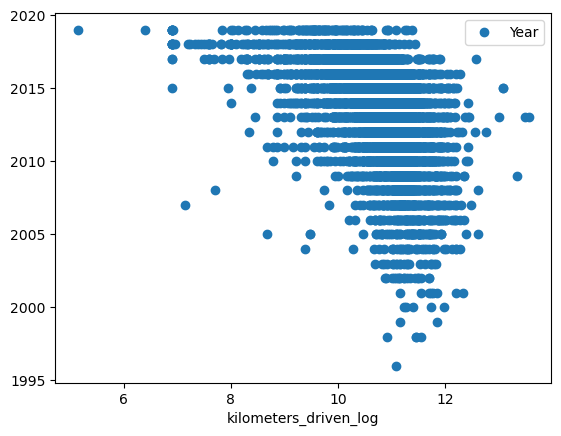

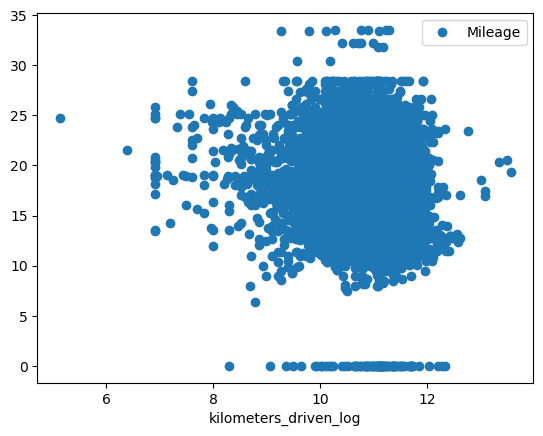

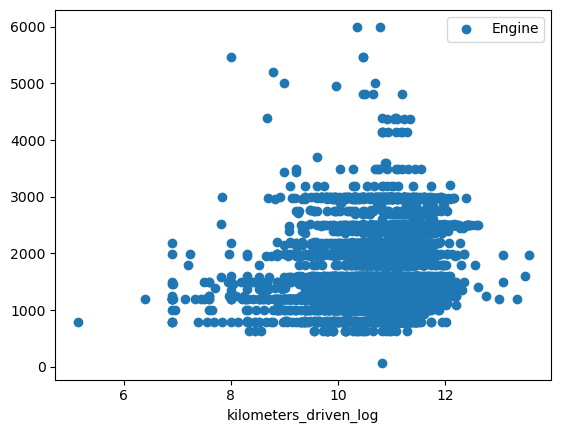

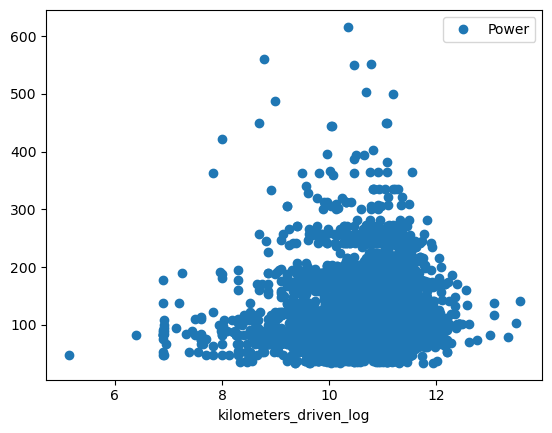

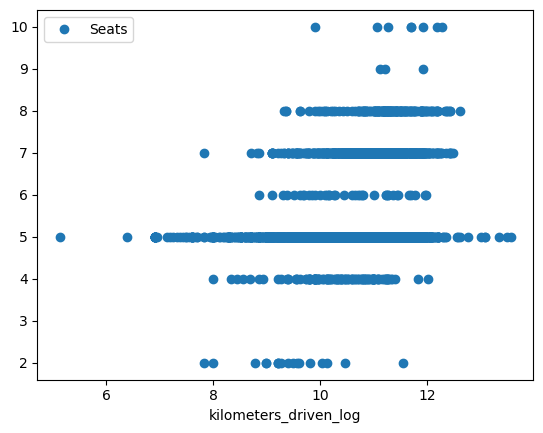

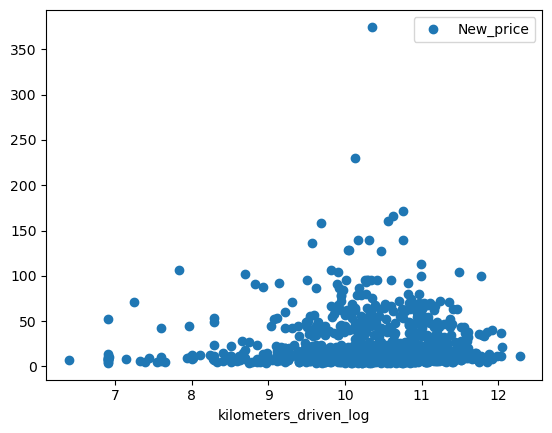

In [86]:
print(cars.plot(x = 'kilometers_driven_log', y = 'Year', style = 'o'))
print(cars.plot(x = 'kilometers_driven_log', y = 'Mileage', style = 'o'))
print(cars.plot(x = 'kilometers_driven_log', y = 'Engine', style = 'o'))
print(cars.plot(x = 'kilometers_driven_log', y = 'Power', style = 'o'))
print(cars.plot(x = 'kilometers_driven_log', y = 'Seats', style = 'o'))
print(cars.plot(x = 'kilometers_driven_log', y = 'New_price', style = 'o'))

<AxesSubplot:xlabel='Price_log'>

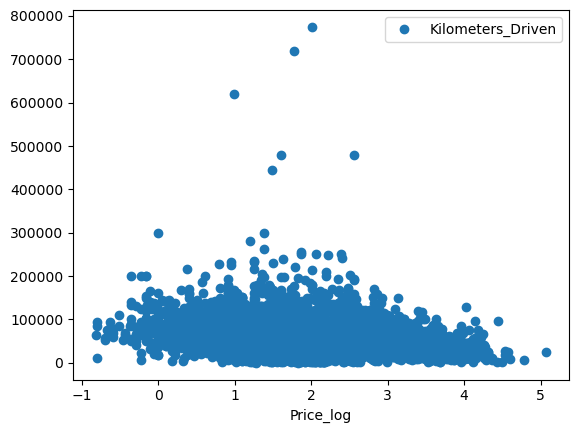

In [84]:
cars.plot(x = 'Price_log', y = 'Kilometers_Driven', style = 'o')

In [13]:
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,6.905753,4.063198
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,7.366445,4.837868
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,7.089243,4.485260
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,7.129298,4.485936
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,7.584773,4.947340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,7.376508,4.640537
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,7.087574,4.640537
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,7.286876,4.144721
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,7.087574,4.640537


<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots:**

- There seems to be a positive correlation beetween `Years` and `Price_Log`. There isnt a clear correlation beetwen `Mileage` and `Price_Log`, but its possible to identify a partial of data with zero values that is not possible due the vehicles in study correspond to used cars. The `Engine` and `Power` has a positive correlation with `Price_Log`. There isnt a correlation beetwen `Seats` and `Price_log`, but its possible to identify 8 possible kind of vehicles with different amount of seats. Finally, there is a positive correlation beetwen `Price_log` and the price of a new car (`New_price`).

- In the case of `kilometers_driven_log` seems to have a negative correlation with `Year`, and that makes sense due to the newest is the car, is more probabilty to has few kilometers driven. There is no correlation with `Mileage`, but the pattern of a big amount of data with Mileage zero explain that there are missing data of used car. There is no clear correlation with `Engine`, `Power`, `Seats` neither with `New_Price`.




### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

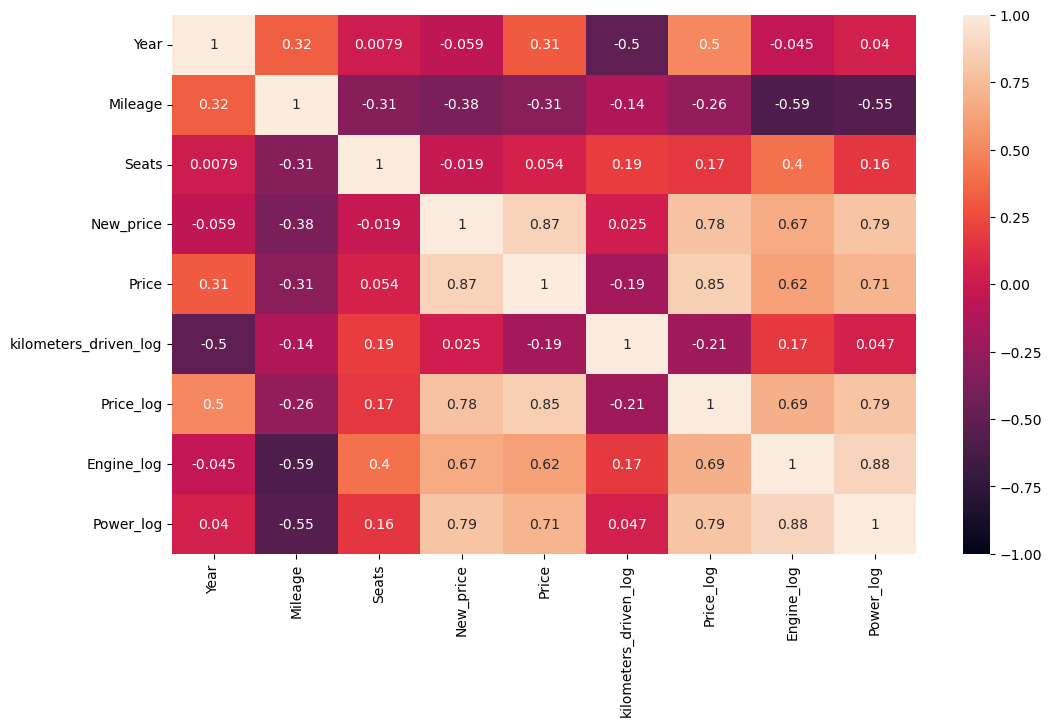

In [14]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(cars.drop(columns={'Kilometers_Driven','Engine','Power'},axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights: **

- `Year` has a moderate correlation with `Kilometer_Driven_log` and `Price_log`. The first a negative moderate correlation and the second a positive moderate correlation. Thats reasonable because the newest is the car, higher will be its price and less kilometers driven would have.
- The `Mileage` present negative moderate correlation with `Engine` and `Power`.
- `Engine` and `Power` has a significant correlation with the `New_Price`, and thats because the car has a better characteristics, reflected in better bodywork.
- `Seats` doesnt present correlation with other variables. Just a low positive correlation with `Engine`.
- The `Price_Log` has a moderate correlation with `Engine` and a significant correlation with `Power` and `New_Price`.

### **3. Box plot**

In [193]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = cars['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = cars['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

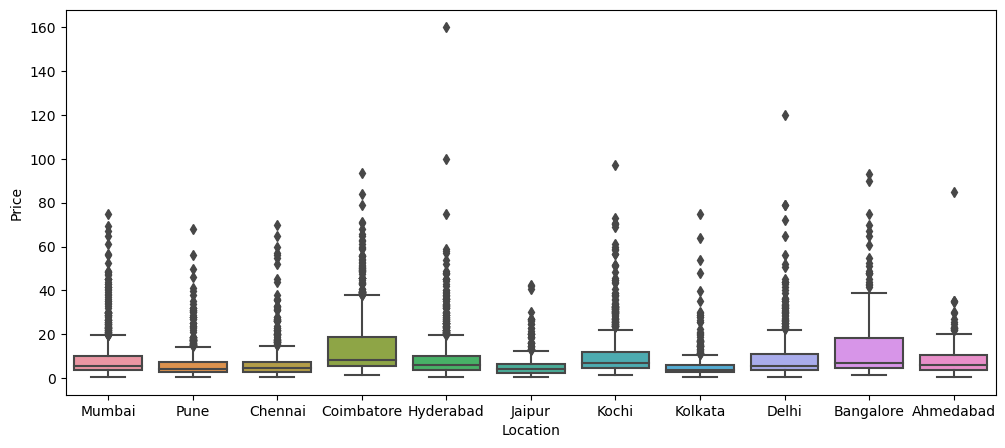

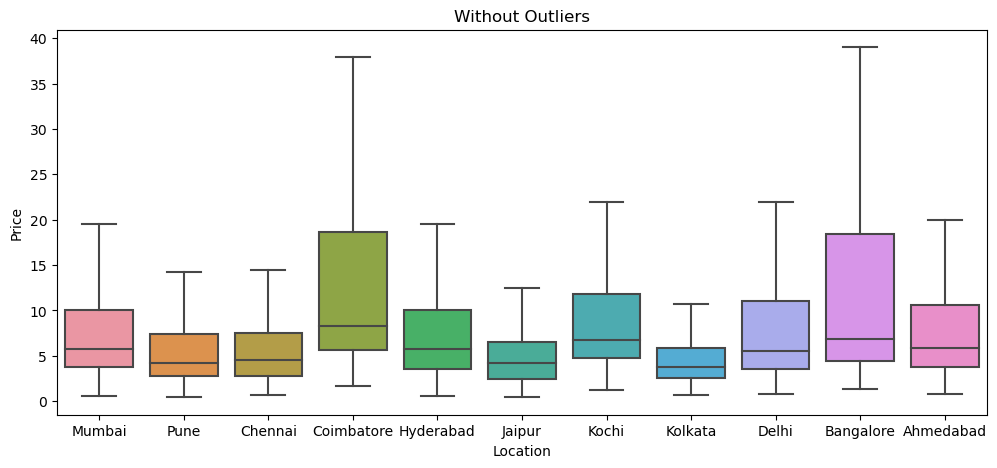

In [43]:
# Box Plot: Price vs Location
boxplot(cars['Location'])

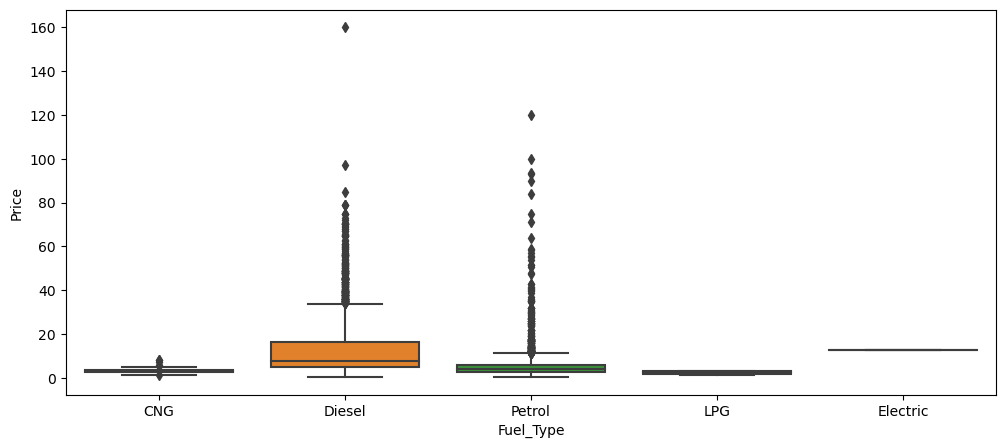

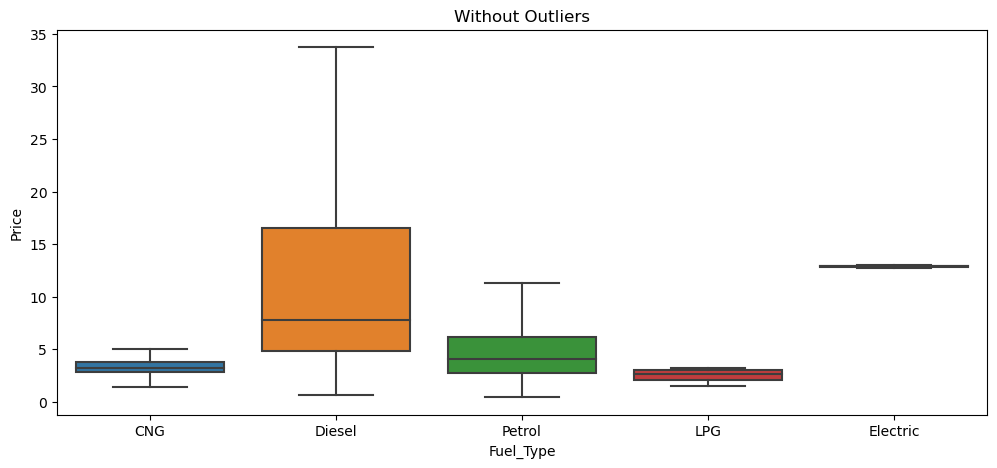

In [44]:
boxplot(cars['Fuel_Type'])

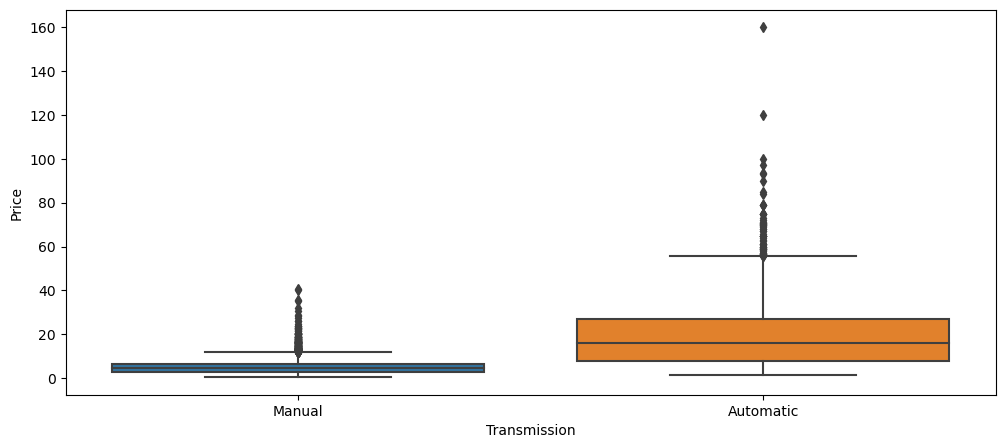

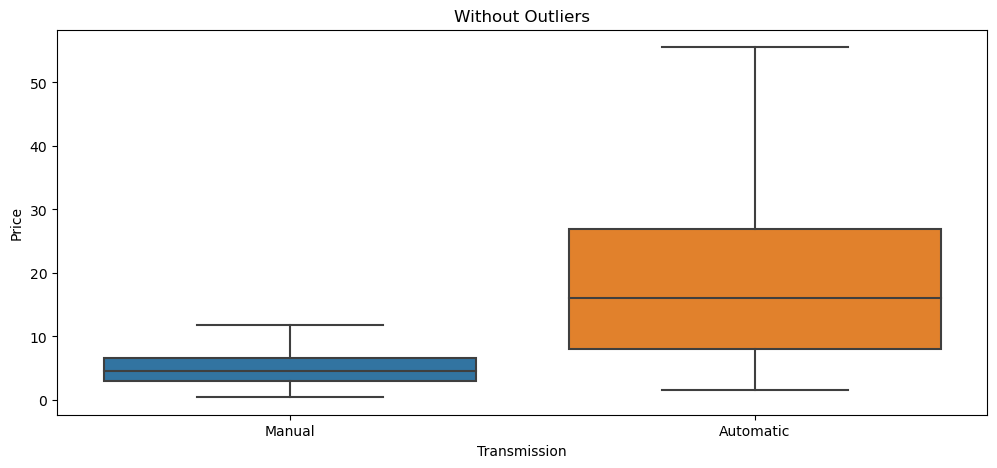

In [45]:
boxplot(cars['Transmission'])

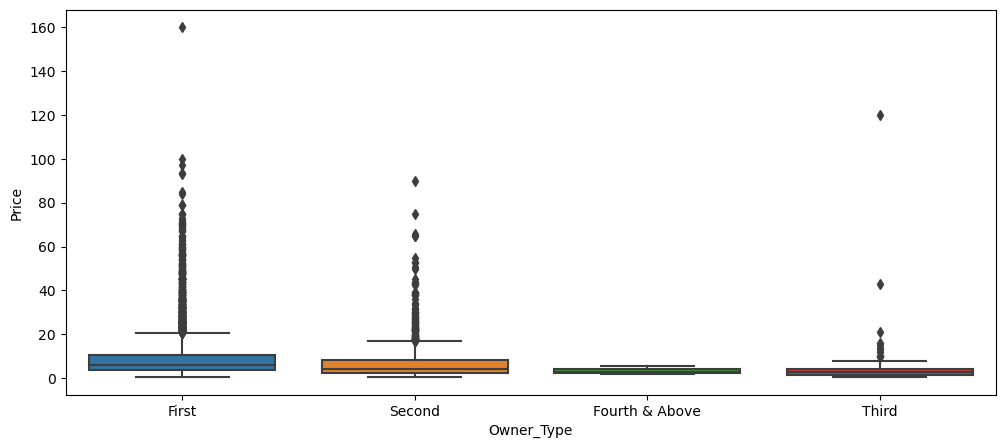

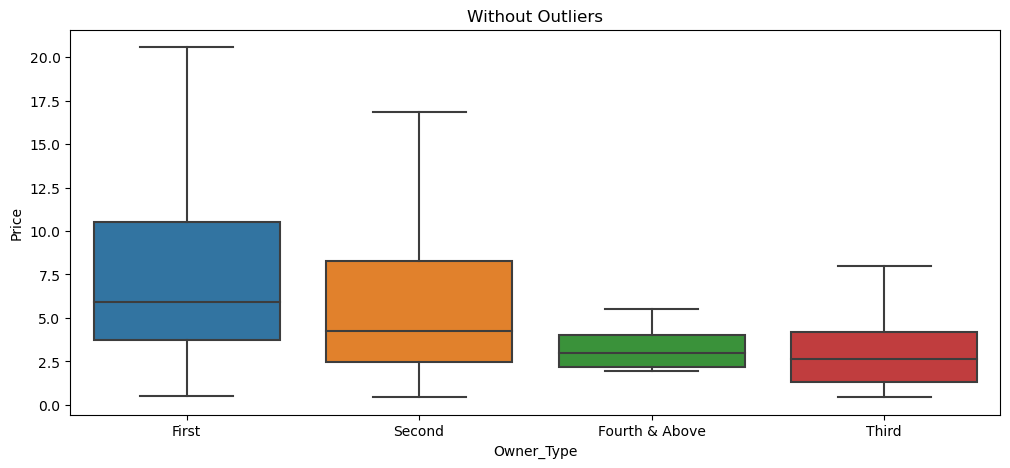

In [46]:
boxplot(cars['Owner_Type'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:**

- The price could reach values near to 160 in location like Hyderabad. But there are other location with outlier near to 100 as Coimbatore, Kochi, Delhi and Bangalore. Taking out the values of outlier, the location with higher values and range are Coimbatore and Bangalore equal to ~40 and [3-40] respectively.

- The price of Diesel vehícle could increare up to 160, and for Petro to 120. Taking out the outliers, the most ranged fuel type is diesel, and petrol reduce in a big mount their price values.

- The most expensive used car correspond to automatic transmission, and without this outlier, the trend of expensier vehicles are related to automatic transmission. The mean price of automatic vehícles could reach to three times of manual vehicles

- The price of the vehicles start to decrease within increase the number of owner of the car.



### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

#### **Observations and Insights:**
- With the `Name` column it is possible to divide the name of the brand in one column, the name of the model in another column and the rest of the information can be in the third column. So in this case is possible to identify the Brand and model with higher prices or with more quantity that will add more possible of analysis to the model.

In [15]:
name = cars["Name"].str.split(expand=True)
cars['Brand']=name.iloc[:, 0].values
cars['Model']=name.iloc[:, 1].values
cars.drop(columns={"Name"}, inplace=True)
cars

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,6.905753,4.063198,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,7.366445,4.837868,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,7.089243,4.485260,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,7.129298,4.485936,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,7.584773,4.947340,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,7.376508,4.640537,Volkswagen,Vento
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,7.087574,4.640537,Volkswagen,Polo
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,7.286876,4.144721,Nissan,Micra
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,7.087574,4.640537,Volkswagen,Polo


### **Missing value treatment**

In [102]:
# Now check the missing values of each column. Hint: Use isnull() method
cars.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Engine_log                 46
Power_log                 175
Brand                       0
Model                       0
dtype: int64

#### **Observations and Insights:**
- As we saw before, the variable with few missing data are `Mileage`, ,`Seats` and `Engine` with 2, 46 and 53 missing values, equal to **0.02%**, **0.63%** and **0.73%** of total data respectively. The `Power`variable has more level of missing data with **2.41%** of total data, equivalent to 175 missing values. There are 2 variable with a high amount of missing data: `New_Price` and `Price` with a **86.12%** and **17.01%** of total data.

**Missing values in Seats**

In [16]:
# Checking missing values in the column 'Seats'
print('Missing values actual:',cars['Seats'].isnull().sum())
null_seats = cars[cars['Seats'].isnull()]
null_seats

Missing values actual: 53


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,NaN,NaN,Honda,City
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,NaN,NaN,Maruti,Swift
229,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,7.311886,4.59512,Ford,Figo
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,NaN,NaN,Maruti,Swift
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,NaN,NaN,Land,Rover
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,NaN,NaN,Honda,City
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,NaN,NaN,Maruti,Swift
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,NaN,NaN,Honda,City
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,NaN,NaN,Land,Rover
1917,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,7.308543,4.60517,Honda,City


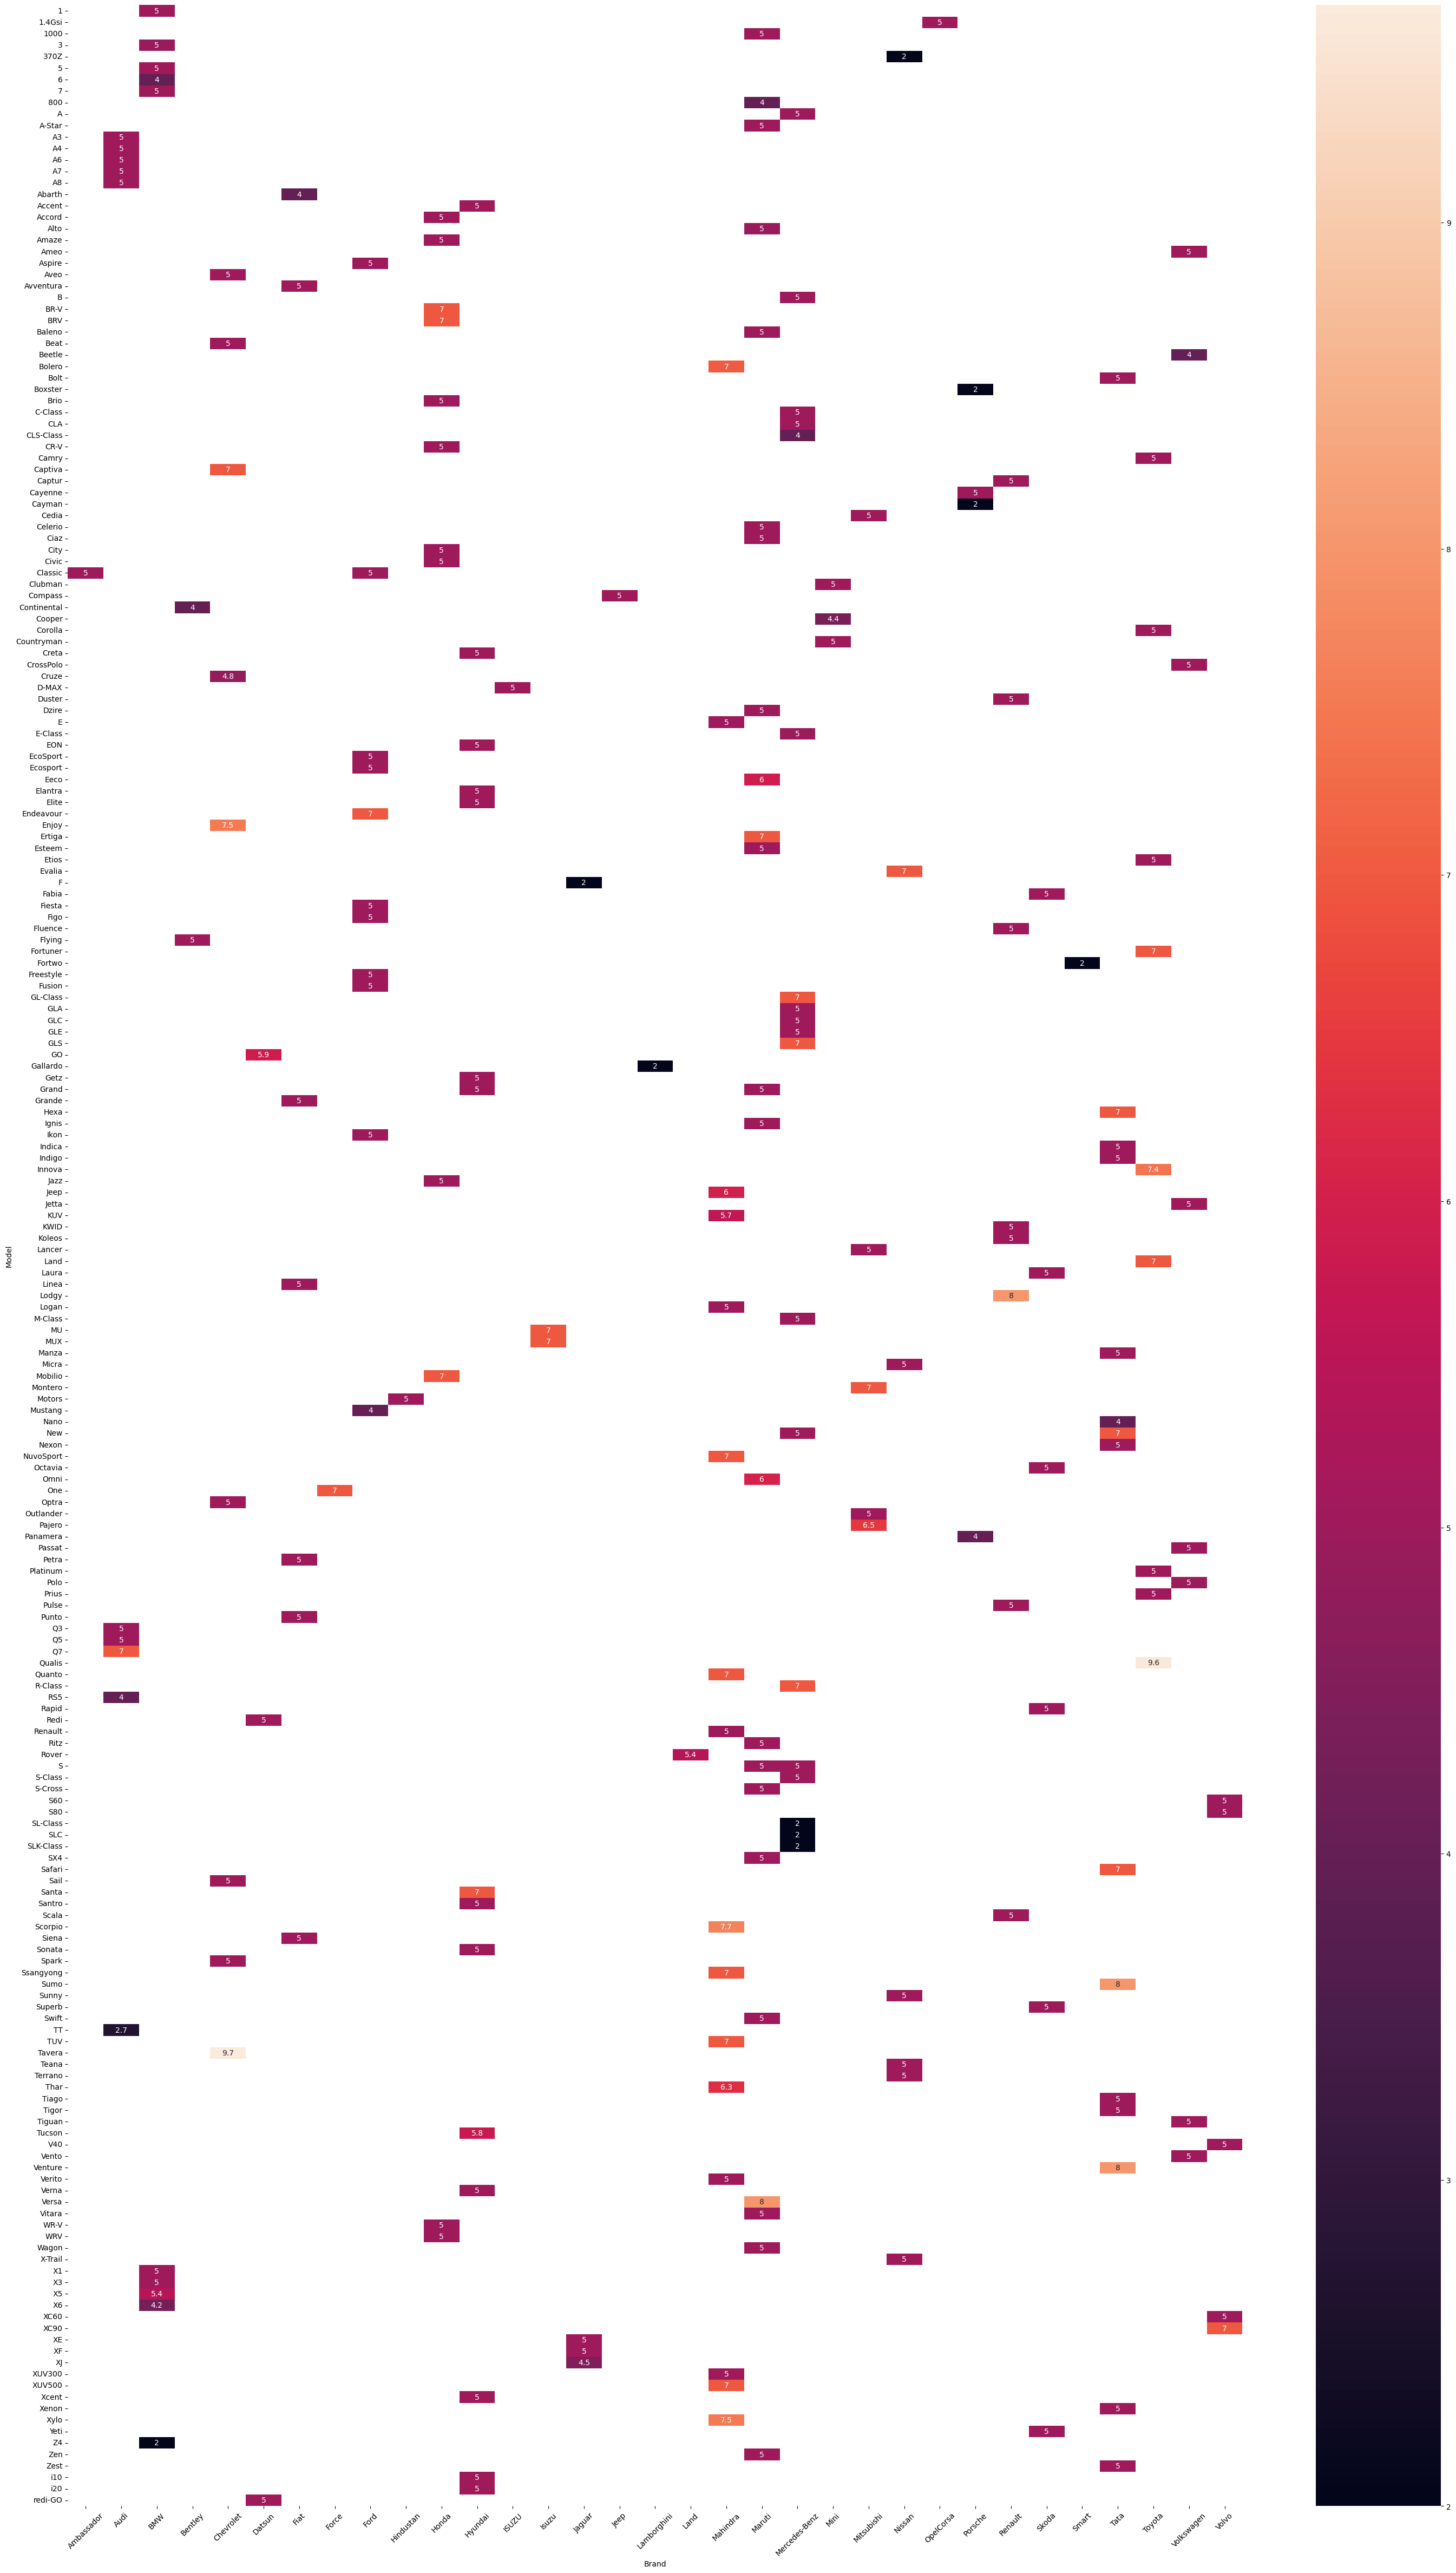

In [104]:
fig = plt.figure(figsize = (35, 60))

sns.heatmap(cars.pivot_table(index = 'Model', columns = 'Brand', values = 'Seats'), annot = True);

plt.xticks(rotation = 45);

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [17]:
medians_seats = cars.groupby('Brand')['Seats'].median()   ###
vacio = cars.isna()

for index, row in vacio.iterrows():
    aux = vacio.loc[index,'Seats']
    if aux == True:
        brand = cars.loc[index,'Brand']
        cars.loc[index,'Seats'] = medians_seats[brand]
        
## Check the index of missing values        
index_na_seats = cars[cars['Seats'].isnull()].index

In [18]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
print('missing Seats values:',cars['Seats'].isnull().sum())

missing Seats values: 0


**Missing values for Mileage**

In [19]:
# Now check missing values of each column. Hint: Use isnull() method
for index, row in cars.iterrows():
    aux2 = cars.loc[index,'Mileage']
    if aux2 == 0:
        cars.loc[index,'Mileage'] = np.nan

print('Missing values actual:',cars['Mileage'].isnull().sum())
null_mileage = cars[cars['Mileage'].isnull()]
null_mileage

Missing values actual: 83


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
14,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115.0,5.0,NaN,17.50,11.350407,2.862201,7.686621,4.744932,Land,Rover
67,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,49.14,35.67,9.640108,3.574310,7.575585,5.267858,Mercedes-Benz,C-Class
79,Hyderabad,2005,87591,Petrol,Manual,First,NaN,1086.0,NaN,5.0,NaN,1.30,11.380434,0.262364,6.990257,NaN,Hyundai,Santro
194,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,5.0,NaN,2.95,11.002200,1.081805,NaN,NaN,Honda,City
229,Bangalore,2015,70436,Diesel,Manual,First,NaN,1498.0,99.0,5.0,NaN,3.60,11.162460,1.280934,7.311886,4.595120,Ford,Figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,7.0,NaN,NaN,10.203592,NaN,NaN,NaN,Mahindra,TUV
6697,Jaipur,2007,85000,Petrol,Manual,Second,NaN,1086.0,NaN,5.0,NaN,NaN,11.350407,NaN,6.990257,NaN,Hyundai,Santro
6857,Mumbai,2011,87000,Diesel,Automatic,First,NaN,2179.0,115.0,5.0,NaN,NaN,11.373663,NaN,7.686621,4.744932,Land,Rover
6957,Kochi,2019,11574,Petrol,Manual,First,NaN,1199.0,88.7,5.0,NaN,NaN,9.356516,NaN,7.089243,4.485260,Honda,Jazz


In [20]:
# Impute missing Mileage. For example, use can use median or any other methods.
medians_mileage = cars.groupby('Brand')['Mileage'].mean() 
# print(medians_mileage)
vacio2 = cars.isna()

for index, row in vacio2.iterrows():
    aux = vacio2.loc[index,'Mileage']
    if aux == True:
        brand = cars.loc[index,'Brand']
        cars.loc[index,'Mileage'] = medians_mileage[brand]
        
index_na_mileage = cars[cars['Mileage'].isnull()].index

In [21]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
print('missing Mileage values:',cars['Mileage'].isnull().sum())
cars.loc[index_na_mileage]

missing Mileage values: 1


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
915,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,NaN,3.0,11.542484,1.098612,6.683361,NaN,Smart,Fortwo


**Missing values for Engine**

In [112]:
print('Missing values actual:',cars['Engine_log'].isnull().sum())
null_engine = cars[cars['Engine'].isnull()]
null_engine

Missing values actual: 46


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
194,Ahmedabad,2007,60006,Petrol,Manual,First,18.556563,NaN,NaN,5.0,NaN,2.95,11.002200,1.081805,NaN,NaN,Honda,City
208,Kolkata,2010,42001,Petrol,Manual,First,16.100000,NaN,NaN,5.0,NaN,2.11,10.645449,0.746688,NaN,NaN,Maruti,Swift
733,Chennai,2006,97800,Petrol,Manual,Third,16.100000,NaN,NaN,5.0,NaN,1.75,11.490680,0.559616,NaN,NaN,Maruti,Swift
749,Mumbai,2008,55001,Diesel,Automatic,Second,12.831053,NaN,NaN,5.0,NaN,26.50,10.915107,3.277145,NaN,NaN,Land,Rover
1294,Delhi,2009,55005,Petrol,Manual,First,12.800000,NaN,NaN,5.0,NaN,3.20,10.915179,1.163151,NaN,NaN,Honda,City
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.100000,NaN,NaN,5.0,NaN,5.80,10.825661,1.757858,NaN,NaN,Maruti,Swift
1385,Pune,2004,115000,Petrol,Manual,Second,18.556563,NaN,NaN,5.0,NaN,1.50,11.652687,0.405465,NaN,NaN,Honda,City
1460,Coimbatore,2008,69078,Petrol,Manual,First,12.831053,NaN,NaN,5.0,NaN,40.88,11.142992,3.710641,NaN,NaN,Land,Rover
2074,Pune,2011,24255,Petrol,Manual,First,16.100000,NaN,NaN,5.0,NaN,3.15,10.096378,1.147402,NaN,NaN,Maruti,Swift
2096,Coimbatore,2004,52146,Petrol,Manual,First,19.245200,NaN,NaN,5.0,NaN,1.93,10.861803,0.657520,NaN,NaN,Hyundai,Santro


In [22]:
medians_engine = cars.groupby('Brand')['Engine_log'].median() 
# print(medians_engine)

for index, row in vacio.iterrows():
    aux = vacio.loc[index,'Engine_log']
    if aux == True:
        brand = cars.loc[index,'Brand']
        cars.loc[index,'Engine_log'] = medians_engine[brand]

index_na_engine = cars[cars['Engine_log'].isnull()].index

In [23]:
print('missing Engine values:',cars['Engine_log'].isnull().sum())

missing Engine values: 0


**Missing values for Power**

In [115]:
print('Missing values actual:',cars['Power_log'].isnull().sum())
null_power = cars[cars['Power_log'].isnull()]
null_power

Missing values actual: 175


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
76,Jaipur,2008,111111,Diesel,Manual,First,17.8000,1399.0,NaN,5.0,NaN,2.00,11.618285,0.693147,7.243513,NaN,Ford,Fiesta
79,Hyderabad,2005,87591,Petrol,Manual,First,19.2452,1086.0,NaN,5.0,NaN,1.30,11.380434,0.262364,6.990257,NaN,Hyundai,Santro
89,Hyderabad,2007,73745,Petrol,Manual,First,17.0000,1086.0,NaN,5.0,NaN,2.10,11.208368,0.741937,6.990257,NaN,Hyundai,Santro
120,Mumbai,2005,102000,Petrol,Manual,Second,17.0000,1086.0,NaN,5.0,NaN,0.85,11.532728,-0.162519,6.990257,NaN,Hyundai,Santro
143,Kochi,2008,80759,Petrol,Manual,Third,17.0000,1086.0,NaN,5.0,NaN,1.67,11.299225,0.512824,6.990257,NaN,Hyundai,Santro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,Hyderabad,2013,86000,Diesel,Manual,First,23.5900,1364.0,NaN,5.0,NaN,NaN,11.362103,NaN,7.218177,NaN,Toyota,Etios
6902,Kochi,2012,59311,Petrol,Manual,First,18.3000,NaN,NaN,7.0,NaN,NaN,10.990550,NaN,7.821643,NaN,Toyota,Etios
6947,Delhi,2012,77800,Petrol,Manual,First,18.3000,1197.0,NaN,5.0,NaN,NaN,11.261897,NaN,7.087574,NaN,Toyota,Etios
7092,Coimbatore,2007,64168,Petrol,Automatic,First,17.0000,1086.0,NaN,5.0,NaN,NaN,11.069260,NaN,6.990257,NaN,Hyundai,Santro


In [24]:
medians_power = cars.groupby('Brand')['Power_log'].median() 
# print(medians_power)

for index, row in vacio.iterrows():
    aux = vacio.loc[index,'Power_log']
    if aux == True:
        brand = cars.loc[index,'Brand']
        cars.loc[index,'Power_log'] = medians_power[brand]

index_na_power = cars[cars['Power_log'].isnull()].index

In [25]:
print('missing Power values:',cars['Power_log'].isnull().sum())
cars.loc[index_na_power]

missing Power values: 2


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
915,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,NaN,3.0,11.542484,1.098612,6.683361,NaN,Smart,Fortwo
6216,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,NaN,11.082143,NaN,7.598399,NaN,Hindustan,Motors


**Missing values for New_price**

In [118]:
print('Missing values actual:',cars['New_price'].isnull().sum())
null_price = cars[cars['New_price'].isnull()]
null_price

Missing values actual: 6246


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,6.905753,4.063198,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,7.366445,4.837868,Hyundai,Creta
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,7.129298,4.485936,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,7.584773,4.947340,Audi,A4
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,11.225243,0.854415,6.701960,4.010963,Hyundai,EON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,7.376508,4.640537,Volkswagen,Vento
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,7.087574,4.640537,Volkswagen,Polo
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,7.286876,4.144721,Nissan,Micra
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,7.087574,4.640537,Volkswagen,Polo


In [26]:
medians_price = cars.groupby('Brand')['New_price'].median() 
# print(medians_price)

for index, row in vacio.iterrows():
    aux = vacio.loc[index,'New_price']
    if aux == True:
        brand = cars.loc[index,'Brand']
        cars.loc[index,'New_price'] = medians_price[brand]

index_na_price = cars[cars['New_price'].isnull()].index

In [27]:
print('missing New_price values:',cars['New_price'].isnull().sum())
cars.loc[index_na_price]

missing New_price values: 162


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
145,Pune,2014,38800,Petrol,Manual,First,18.60,1199.0,76.80,5.0,NaN,2.85,10.566176,1.047319,7.089243,4.341205,Chevrolet,Beat
179,Jaipur,2012,88000,Diesel,Manual,First,25.44,936.0,57.60,5.0,NaN,1.50,11.385092,0.405465,6.841615,4.053523,Chevrolet,Beat
183,Jaipur,2007,118500,Petrol,Manual,First,12.90,1598.0,102.50,5.0,NaN,1.25,11.682668,0.223144,7.376508,4.629863,Chevrolet,Optra
231,Kochi,2016,60813,Petrol,Manual,Second,18.60,1199.0,76.80,5.0,NaN,3.32,11.015559,1.199965,7.089243,4.341205,Chevrolet,Beat
240,Mumbai,2013,74000,Diesel,Manual,First,25.44,936.0,57.60,5.0,NaN,2.65,11.211820,0.974560,6.841615,4.053523,Chevrolet,Beat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7111,Mumbai,2013,39000,Petrol,Manual,First,13.70,1399.0,98.82,7.0,NaN,NaN,10.571317,NaN,7.243513,4.593300,Chevrolet,Enjoy
7136,Jaipur,2010,6512,Petrol,Manual,First,16.00,995.0,63.00,5.0,NaN,NaN,8.781402,NaN,6.902743,4.143135,Chevrolet,Spark
7141,Pune,2016,67000,Petrol,Manual,First,13.70,1399.0,98.79,8.0,NaN,NaN,11.112448,NaN,7.243513,4.592996,Chevrolet,Enjoy
7223,Kochi,2011,99120,Diesel,Manual,First,11.50,1991.0,147.90,7.0,NaN,NaN,11.504087,NaN,7.596392,4.996536,Chevrolet,Captiva


In [28]:
cars.drop([915,6216], inplace = True)

In [29]:
cars.drop(columns={"Engine","Power"}, inplace=True)
print(cars.shape)
cars.isnull().sum()

(7250, 16)


Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Seats                       0
New_price                 160
Price                    1233
kilometers_driven_log       0
Price_log                1233
Engine_log                  0
Power_log                   0
Brand                       0
Model                       0
dtype: int64

In [30]:
cars_cleaned = cars.dropna(axis=0)
print(cars_cleaned.shape)
cars_cleaned.isnull().sum()

(5889, 16)


Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
Engine_log               0
Power_log                0
Brand                    0
Model                    0
dtype: int64

**Observations for missing values after imputing: **
- For the values **915** and **6216** (equivalent to Smart and Hindustan car) there are few information (no Engine and price information) so these value are going to be dropped. Still remaining **160** variables with missing new_price data that will dropped with dropna() function.

### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [31]:
# Assume df_cleaned is the pre-processed data frame in your code, then
cars_cleaned.to_csv("cars_data_updated.csv", index = False)
cars_cleaned

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,5.0,7.870,1.75,11.184421,0.559616,6.905753,4.063198,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,5.0,9.740,12.50,10.621327,2.525729,7.366445,4.837868,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,5.0,8.610,4.50,10.736397,1.504077,7.089243,4.485260,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,7.0,7.870,6.00,11.373663,1.791759,7.129298,4.485936,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,5.0,55.610,17.74,10.613246,2.875822,7.584773,4.947340,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Coimbatore,2015,70602,Diesel,Manual,First,25.80,5.0,11.150,4.83,11.164814,1.574846,7.311886,4.591071,Honda,Amaze
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,5.0,7.880,4.75,10.217020,1.558145,7.129298,4.304065,Maruti,Swift
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,5.0,9.740,4.00,11.512925,1.386294,7.021084,4.262680,Hyundai,Xcent
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,8.0,11.145,2.90,10.915088,1.064711,7.823246,4.718499,Mahindra,Xylo


The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.

In [32]:
# cars_data = pd.read_csv("cars_data_updated.csv")
cars_data = cars_cleaned.copy(deep=True)
cars_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,kilometers_driven_log,Price_log,Engine_log,Power_log,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,5.0,7.87,1.75,11.184421,0.559616,6.905753,4.063198,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,5.0,9.74,12.50,10.621327,2.525729,7.366445,4.837868,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,5.0,8.61,4.50,10.736397,1.504077,7.089243,4.485260,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,7.0,7.87,6.00,11.373663,1.791759,7.129298,4.485936,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,5.0,55.61,17.74,10.613246,2.875822,7.584773,4.947340,Audi,A4


### **Split the Data**
<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [33]:
# Step-1

y = cars_data[["Price","Price_log"]]
X = cars_data.drop(columns={'Price_log','Brand','Model','Kilometers_Driven','Price'}, inplace=False)

print(X.describe(include = ['object']))
print()
print(X.describe())
print()
print(y.describe())
X

       Location Fuel_Type Transmission Owner_Type
count      5889      5889         5889       5889
unique       11         5            2          4
top      Mumbai    Diesel       Manual      First
freq        778      3141         4181       4834

              Year      Mileage        Seats    New_price  \
count  5889.000000  5889.000000  5889.000000  5889.000000   
mean   2013.395653    18.331864     5.278485    21.265641   
std       3.268294     4.168918     0.797764    24.236658   
min    1998.000000     7.500000     2.000000     3.910000   
25%    2012.000000    15.300000     5.000000     7.870000   
50%    2014.000000    18.250000     5.000000    11.105000   
75%    2016.000000    21.100000     5.000000    23.250000   
max    2019.000000    33.540000    10.000000   375.000000   

       kilometers_driven_log   Engine_log    Power_log  
count            5889.000000  5889.000000  5889.000000  
mean               10.755121     7.333052     4.638640  
std                 0.715155

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,kilometers_driven_log,Engine_log,Power_log
0,Mumbai,2010,CNG,Manual,First,26.60,5.0,7.870,11.184421,6.905753,4.063198
1,Pune,2015,Diesel,Manual,First,19.67,5.0,9.740,10.621327,7.366445,4.837868
2,Chennai,2011,Petrol,Manual,First,18.20,5.0,8.610,10.736397,7.089243,4.485260
3,Chennai,2012,Diesel,Manual,First,20.77,7.0,7.870,11.373663,7.129298,4.485936
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,5.0,55.610,10.613246,7.584773,4.947340
...,...,...,...,...,...,...,...,...,...,...,...
6013,Coimbatore,2015,Diesel,Manual,First,25.80,5.0,11.150,11.164814,7.311886,4.591071
6014,Delhi,2014,Diesel,Manual,First,28.40,5.0,7.880,10.217020,7.129298,4.304065
6015,Jaipur,2015,Diesel,Manual,First,24.40,5.0,9.740,11.512925,7.021084,4.262680
6016,Jaipur,2012,Diesel,Manual,Second,14.00,8.0,11.145,10.915088,7.823246,4.718499


In [34]:
# Step-2 Use pd.get_dummies(drop_first = True)
num_cols = ['Year','Mileage','Engine_log','Power_log','Seats','New_price','kilometers_driven_log']
cat_cols = ['Location','Fuel_Type','Transmission','Owner_Type']

cars_transformed = pd.get_dummies(
    X,
    columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)
cars_transformed

,Year,Mileage,Seats,New_price,kilometers_driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,5.0,7.870,11.184421,6.905753,4.063198,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,19.67,5.0,9.740,10.621327,7.366445,4.837868,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,18.20,5.0,8.610,10.736397,7.089243,4.485260,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,20.77,7.0,7.870,11.373663,7.129298,4.485936,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,15.20,5.0,55.610,10.613246,7.584773,4.947340,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,2015,25.80,5.0,11.150,11.164814,7.311886,4.591071,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6014,2014,28.40,5.0,7.880,10.217020,7.129298,4.304065,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,2015,24.40,5.0,9.740,11.512925,7.021084,4.262680,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,2012,14.00,8.0,11.145,10.915088,7.823246,4.718499,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0


In [35]:
# Step-2 Using OnHotEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['Location','Fuel_Type','Transmission','Owner_Type']),
    remainder='passthrough')

transformed = transformer.fit_transform(X)
cars_transformed_OHE = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
print(transformer.get_feature_names_out())
print('Columnas:',cars_transformed_OHE.columns)
print()
print('Dimension:',cars_transformed_OHE.shape)
print()
cars_transformed_OHE

['onehotencoder__Location_Ahmedabad' 'onehotencoder__Location_Bangalore'
 'onehotencoder__Location_Chennai' 'onehotencoder__Location_Coimbatore'
 'onehotencoder__Location_Delhi' 'onehotencoder__Location_Hyderabad'
 'onehotencoder__Location_Jaipur' 'onehotencoder__Location_Kochi'
 'onehotencoder__Location_Kolkata' 'onehotencoder__Location_Mumbai'
 'onehotencoder__Location_Pune' 'onehotencoder__Fuel_Type_CNG'
 'onehotencoder__Fuel_Type_Diesel' 'onehotencoder__Fuel_Type_Electric'
 'onehotencoder__Fuel_Type_LPG' 'onehotencoder__Fuel_Type_Petrol'
 'onehotencoder__Transmission_Automatic'
 'onehotencoder__Transmission_Manual' 'onehotencoder__Owner_Type_First'
 'onehotencoder__Owner_Type_Fourth & Above'
 'onehotencoder__Owner_Type_Second' 'onehotencoder__Owner_Type_Third'
 'remainder__Year' 'remainder__Mileage' 'remainder__Seats'
 'remainder__New_price' 'remainder__kilometers_driven_log'
 'remainder__Engine_log' 'remainder__Power_log']
Columnas: Index(['onehotencoder__Location_Ahmedabad',
    

,onehotencoder__Location_Ahmedabad,onehotencoder__Location_Bangalore,onehotencoder__Location_Chennai,onehotencoder__Location_Coimbatore,onehotencoder__Location_Delhi,onehotencoder__Location_Hyderabad,onehotencoder__Location_Jaipur,onehotencoder__Location_Kochi,onehotencoder__Location_Kolkata,onehotencoder__Location_Mumbai,onehotencoder__Location_Pune,onehotencoder__Fuel_Type_CNG,onehotencoder__Fuel_Type_Diesel,onehotencoder__Fuel_Type_Electric,onehotencoder__Fuel_Type_LPG,onehotencoder__Fuel_Type_Petrol,onehotencoder__Transmission_Automatic,onehotencoder__Transmission_Manual,onehotencoder__Owner_Type_First,onehotencoder__Owner_Type_Fourth & Above,onehotencoder__Owner_Type_Second,onehotencoder__Owner_Type_Third,remainder__Year,remainder__Mileage,remainder__Seats,remainder__New_price,remainder__kilometers_driven_log,remainder__Engine_log,remainder__Power_log
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2010.0,26.60,5.0,7.870,11.184421,6.905753,4.063198
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2015.0,19.67,5.0,9.740,10.621327,7.366445,4.837868
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2011.0,18.20,5.0,8.610,10.736397,7.089243,4.485260
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2012.0,20.77,7.0,7.870,11.373663,7.129298,4.485936
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2013.0,15.20,5.0,55.610,10.613246,7.584773,4.947340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2015.0,25.80,5.0,11.150,11.164814,7.311886,4.591071
5885,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2014.0,28.40,5.0,7.880,10.217020,7.129298,4.304065
5886,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2015.0,24.40,5.0,9.740,11.512925,7.021084,4.262680
5887,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2012.0,14.00,8.0,11.145,10.915088,7.823246,4.718499


In [36]:
# Step-3 Scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cars_scaled = sc.fit_transform(cars_transformed)
cars_scaled = pd.DataFrame(cars_scaled, columns = cars_transformed.columns)
cars_scaled

,Year,Mileage,Seats,New_price,kilometers_driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-1.039056,1.983450,-0.349112,-0.552749,0.600341,-1.257763,-1.389037,-0.251754,-0.297218,-0.344265,-0.32096,-0.376753,-0.270673,-0.34765,-0.309567,2.563086,-0.337438,-1.069118,-0.018432,-0.041243,-0.913866,0.639152,-0.039123,-0.436370,-0.13408
1,0.490924,0.321006,-0.349112,-0.475586,-0.187100,0.098292,0.480908,-0.251754,-0.297218,-0.344265,-0.32096,-0.376753,-0.270673,-0.34765,-0.309567,-0.390155,2.963510,0.935351,-0.018432,-0.041243,-0.913866,0.639152,-0.039123,-0.436370,-0.13408
2,-0.733060,-0.031633,-0.349112,-0.522214,-0.026185,-0.717657,-0.370238,-0.251754,3.364533,-0.344265,-0.32096,-0.376753,-0.270673,-0.34765,-0.309567,-0.390155,-0.337438,-1.069118,-0.018432,-0.041243,1.094252,0.639152,-0.039123,-0.436370,-0.13408
3,-0.427064,0.584886,2.158108,-0.552749,0.864980,-0.599756,-0.368606,-0.251754,3.364533,-0.344265,-0.32096,-0.376753,-0.270673,-0.34765,-0.309567,-0.390155,-0.337438,0.935351,-0.018432,-0.041243,-0.913866,0.639152,-0.039123,-0.436370,-0.13408
4,-0.121068,-0.751305,-0.349112,1.417162,-0.198401,0.740945,0.745160,-0.251754,-0.297218,2.904738,-0.32096,-0.376753,-0.270673,-0.34765,-0.309567,-0.390155,-0.337438,0.935351,-0.018432,-0.041243,-0.913866,-1.564574,-0.039123,2.291635,-0.13408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,0.490924,1.791537,-0.349112,-0.417405,0.572921,-0.062303,-0.114824,-0.251754,-0.297218,2.904738,-0.32096,-0.376753,-0.270673,-0.34765,-0.309567,-0.390155,-0.337438,0.935351,-0.018432,-0.041243,-0.913866,0.639152,-0.039123,-0.436370,-0.13408
5885,0.184928,2.415253,-0.349112,-0.552336,-0.752490,-0.599756,-0.807617,-0.251754,-0.297218,-0.344265,3.11565,-0.376753,-0.270673,-0.34765,-0.309567,-0.390155,-0.337438,0.935351,-0.018432,-0.041243,-0.913866,0.639152,-0.039123,-0.436370,-0.13408
5886,0.490924,1.455690,-0.349112,-0.475586,1.059727,-0.918285,-0.907515,-0.251754,-0.297218,-0.344265,-0.32096,-0.376753,3.694490,-0.34765,-0.309567,-0.390155,-0.337438,0.935351,-0.018432,-0.041243,-0.913866,0.639152,-0.039123,-0.436370,-0.13408
5887,-0.427064,-1.039174,3.411718,-0.417611,0.223701,1.442894,0.192768,-0.251754,-0.297218,-0.344265,-0.32096,-0.376753,3.694490,-0.34765,-0.309567,-0.390155,-0.337438,0.935351,-0.018432,-0.041243,-0.913866,0.639152,-0.039123,2.291635,-0.13408


In [37]:
# Step-4 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
# Scaling the data
#X_train, X_test, y_train, y_test = train_test_split(cars_scaled, y, test_size = 0.3, random_state = 1)
## No scaling the data
X_train, X_test, y_train, y_test = train_test_split(cars_transformed, y, test_size = 0.3, random_state = 1)

print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

Shape of Training set :  (4122, 25)
Shape of test set :  (1767, 25)


In [38]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):

    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-square on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list



For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [39]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [40]:
# Create a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train['Price_log'])
LR_score = get_model_score(lr)

R-square on training set :  0.7139842404896555
R-square on test set :  0.871666337737028
RMSE on training set :  6.135837166295946
RMSE on test set :  3.7122207139427124


,**Observations from results:**
- R2  is negative when the chosen model does not follow the trend of the data, that is the case of training set. The regression is worse than using a simple mean. This can happen when the relationship between features and target variable is not linear and may be curvilinear, hence try one of these models - log-linear model or linear - log model or log-log model. Another option could be if the target variable is highly skewed, then it can lead to a negative R2 score. Transforming them makes it better, that is happened in this case, increasing the performance to over 0.7
- The R square increase its performance on test set, having a acceptable fit on the prediction.
- Considering the values of Price in range of 0.4 - 160, RMSE is on level of the dependent variable (Price). The RMSE increase its performance on test set decreasing the RMSE value.
- This model has a good performance with a high r squared and reduced RMSE.

**Important variables of Linear Regression**

In [266]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    
    return olsmodel.fit()

#X_train.reindex(y_train["Price_log"].index)
#X_train = np.array(y_train) 
#y_train = np.array(X_train)
#print(len(X_train))
#print(len(y_train))


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1828.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:41:01   Log-Likelihood:                -163.66
No. Observations:                4122   AIC:                             379.3
Df Residuals:                    4096   BIC:                             543.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [267]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues
olsmod.round(3)

,coef,pval
const,-230.126,0.000
Year,0.113,0.000
Mileage,-0.004,0.002
Seats,0.046,0.000
New_price,0.008,0.000
kilometers_driven_log,-0.080,0.000
Engine_log,0.229,0.000
Power_log,0.857,0.000
Location_Bangalore,0.162,0.000
Location_Chennai,0.021,0.403


In [268]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

print(olsmod['pval']> 0.05)

olsmod[pval_filter].round(3)

Fuel_Type_LPG                 True
Location_Chennai              True
Location_Kochi                True
Owner_Type_Fourth & Above     True
Location_Jaipur               True
Fuel_Type_Diesel              True
Location_Pune                False
Location_Mumbai              False
Location_Delhi               False
Mileage                      False
Fuel_Type_Petrol             False
Location_Coimbatore          False
Owner_Type_Third             False
Location_Hyderabad           False
Location_Bangalore           False
Engine_log                   False
Owner_Type_Second            False
Seats                        False
Fuel_Type_Electric           False
Location_Kolkata             False
kilometers_driven_log        False
Transmission_Manual          False
New_price                    False
Power_log                    False
Year                         False
const                        False
Name: pval, dtype: bool


,coef,pval
Location_Pune,-0.056,0.020
Location_Mumbai,-0.058,0.013
Location_Delhi,-0.065,0.007
Mileage,-0.004,0.002
Fuel_Type_Petrol,-0.138,0.001
Location_Coimbatore,0.103,0.000
Owner_Type_Third,-0.164,0.000
Location_Hyderabad,0.125,0.000
Location_Bangalore,0.162,0.000
Engine_log,0.229,0.000


In [269]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()
# print(mp_vars)
# print(X.columns)

# We are going to get overall variables (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in mp_vars:
    if '' in col:
#         print('valor de mp_vars:',col)
        first_part = col.split('_')[0]
#         print('valor first part:',first_part)
        for c in cat_cols:
#             print('valor c:',c)
            if first_part in c and c not in sig_var :
#                 print('se agrega a sig_var:',c)
                sig_var.append(col)
#             else: 
#                 print('No se agrega',c)
               
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical variables of LINEAR REGRESSION  are ' +end,':\n', sig_var)
print('Total categorical variables:',len(sig_var))

Most overall significant categorical variables of LINEAR REGRESSION  are  :
 ['Location_Pune', 'Location_Mumbai', 'Location_Delhi', 'Fuel_Type_Petrol', 'Location_Coimbatore', 'Owner_Type_Third', 'Location_Hyderabad', 'Location_Bangalore', 'Owner_Type_Second', 'Fuel_Type_Electric', 'Location_Kolkata', 'Transmission_Manual']
Total categorical variables: 12


In [273]:
X1_train = X_train.drop(columns={'Fuel_Type_LPG','Location_Chennai','Location_Kochi','Owner_Type_Fourth & Above','Location_Jaipur','Fuel_Type_Diesel'})
X1_test = X_test.drop(columns={'Fuel_Type_LPG','Location_Chennai','Location_Kochi','Owner_Type_Fourth & Above','Location_Jaipur','Fuel_Type_Diesel'})

# Statsmodel api does not add a constant by default. We need to add it explicitly
x1_train = sm.add_constant(X1_train)

# Add constant to test data
x1_test = sm.add_constant(X1_test)

olsmodel2 = build_ols_model(x1_train)

print(olsmodel2.summary())



                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2401.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:45:38   Log-Likelihood:                -169.33
No. Observations:                4122   AIC:                             378.7
Df Residuals:                    4102   BIC:                             505.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -228.91

**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

In [41]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

target  = 'Price_log'

In [50]:
# Create a Ridge regression model and Fit Ridge regression mode
ridge = Ridge()
ridge.fit(X_train, y_train[target])
Ridge_model = get_model_score(ridge)

R-square on training set :  0.716314793971078
R-square on test set :  0.8711585381829993
RMSE on training set :  6.110787591955018
RMSE on test set :  3.719557849546372


In [43]:
# Create a Lasso regression model and Fit Ridge regression mode
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train[target])
Lasso_model = get_model_score(lasso)

R-square on training set :  0.10155392008570163
R-square on test set :  0.0946227266356271
RMSE on training set :  10.874889506854567
RMSE on test set :  9.860031221768608


**Observations from results:**
- Looking for the RMSE results, the Ridge Regularization has a better performance than Lasso regularization, both in training set and test set. Its better to make some features coefficiente to zero than still having with a low value.

### **Decision Tree** 

In [336]:
# Import Decision tree for Regression from sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state = 1)
dtree.fit(X_train, y_train[target])

DecisionTreeRegressor(random_state=1)

In [337]:
Dtree_model = get_model_score(dtree)

R-square on training set :  0.9999994355276701
R-square on test set :  0.8647929346458388
RMSE on training set :  0.008619859219711803
RMSE on test set :  3.810335255241864


**Observations from results:**
- Decision tree usually "overfit" the data (in the sense that every point is assigned to a specific class) if you don't provide them early stopping criterion when you grow the tree. By applying the model to the test data, it is possible to see that the problem is alleviated in such a way as to eliminate overfitting and obtain more realistic results for the model predictions.
- The RMSE in training set is very low because we are overfitting the problem, so its naturally that RMSE will increase in test set.

In [301]:
print('Importance feature Decision tree:')
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

Importance feature Decision tree:
                                Imp
Power_log                  0.608433
Year                       0.235887
New_price                  0.077574
Engine_log                 0.018086
kilometers_driven_log      0.014939
Mileage                    0.014483
Seats                      0.005720
Location_Kolkata           0.003671
Location_Hyderabad         0.003241
Transmission_Manual        0.002315
Location_Bangalore         0.001802
Location_Coimbatore        0.001790
Owner_Type_Third           0.001775
Location_Delhi             0.001587
Location_Pune              0.001346
Owner_Type_Second          0.001306
Location_Mumbai            0.001069
Fuel_Type_Diesel           0.001039
Location_Chennai           0.000917
Location_Kochi             0.000875
Fuel_Type_Electric         0.000770
Location_Jaipur            0.000678
Fuel_Type_Petrol           0.000662
Owner_Type_Fourth & Above  0.000026
Fuel_Type_LPG              0.000006


**Observations and insights:**
- The Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (accross all tress) that include the feature, proportionaly to the number of samples it splits.*
- We will use as **Root node** the **Power_log** feature because it has the higher Gini index. The next two features that could be used for **Decision node** are **Year** and **New_Price** respectively.

### **Random Forest**

In [297]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=150)
rf_regressor.fit(X_train, y_train[target])
RandomForest_model = get_model_score(rf_regressor)

R-square on training set :  0.977394550145809
R-square on test set :  0.9178778210126649
RMSE on training set :  1.7249853895721543
RMSE on test set :  2.9695710992855955


**Observations and insights:**
- With the Bootstrapping process we decrease the overfitting presented in Decision Tree as itself. The R-square presente a better performance on training set (decreasing the overfitting) and improving the R-square in test set. The RMSE decrease for Random Forest than Decision Tree, so the use of bootstrapping process improve the model performance.

In [300]:
# Print important features similar to decision trees
print('Importance features Random Forest:')
print(pd.DataFrame(rf_regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

Importance features Random Forest:
                                Imp
Power_log                  0.553828
Year                       0.235119
New_price                  0.126000
Engine_log                 0.027439
kilometers_driven_log      0.015264
Mileage                    0.013473
Location_Kolkata           0.003846
Seats                      0.003725
Location_Hyderabad         0.003136
Location_Coimbatore        0.002108
Location_Bangalore         0.001662
Transmission_Manual        0.001609
Owner_Type_Second          0.001576
Location_Delhi             0.001478
Location_Mumbai            0.001424
Fuel_Type_Petrol           0.001407
Fuel_Type_Diesel           0.001338
Location_Kochi             0.001332
Location_Pune              0.001175
Location_Chennai           0.001042
Location_Jaipur            0.000863
Owner_Type_Third           0.000777
Fuel_Type_Electric         0.000346
Owner_Type_Fourth & Above  0.000029
Fuel_Type_LPG              0.000004


In [338]:
# Choose the type of estimator 
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': np.arange(2, 7), 
              
              'criterion': ['squared_error'],
              
              'min_samples_leaf': [5, 10, 20, 25],
             }

# Type of scoring used to compare parameter combinations
# scorer = make_scorer(mean_squared_error)
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train[target])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train[target])

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, random_state=1)

In [303]:
# Get score of the dtree_tuned
dtree_tuned = get_model_score(dtree_tuned)

R-square on training set :  0.8728267712182164
R-square on test set :  0.8516009988612958
RMSE on training set :  4.091444767787172
RMSE on test set :  3.991893853530871


[Text(0.49848790322580644, 0.9285714285714286, 'X[6] <= 4.935\nsquared_error = 0.77\nsamples = 4122\nvalue = 1.833'),
 Text(0.2550403225806452, 0.7857142857142857, 'X[0] <= 2011.5\nsquared_error = 0.372\nsamples = 3147\nvalue = 1.492'),
 Text(0.12903225806451613, 0.6428571428571429, 'X[6] <= 4.608\nsquared_error = 0.303\nsamples = 793\nvalue = 0.879'),
 Text(0.06451612903225806, 0.5, 'X[0] <= 2005.5\nsquared_error = 0.226\nsamples = 548\nvalue = 0.681'),
 Text(0.03225806451612903, 0.35714285714285715, 'X[3] <= 10.443\nsquared_error = 0.141\nsamples = 77\nvalue = 0.018'),
 Text(0.016129032258064516, 0.21428571428571427, 'X[6] <= 3.723\nsquared_error = 0.122\nsamples = 58\nvalue = -0.079'),
 Text(0.008064516129032258, 0.07142857142857142, 'squared_error = 0.051\nsamples = 5\nvalue = -0.558'),
 Text(0.024193548387096774, 0.07142857142857142, 'squared_error = 0.105\nsamples = 53\nvalue = -0.034'),
 Text(0.04838709677419355, 0.21428571428571427, 'X[16] <= 0.5\nsquared_error = 0.083\nsamples

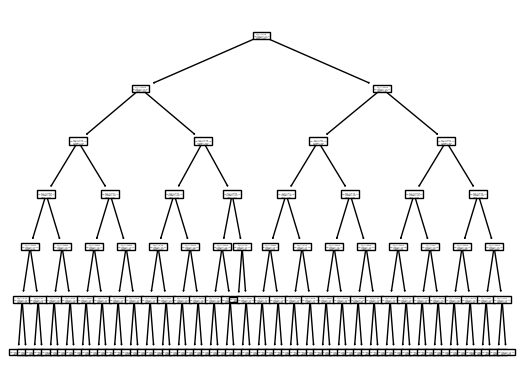

In [339]:
tree.plot_tree(dtree_tuned)

In [306]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                Imp
Power_log                  0.661843
Year                       0.246318
New_price                  0.075009
Engine_log                 0.009948
Seats                      0.003643
Mileage                    0.001330
Fuel_Type_Diesel           0.000707
Owner_Type_Third           0.000326
Transmission_Manual        0.000307
kilometers_driven_log      0.000188
Fuel_Type_Petrol           0.000188
Location_Pune              0.000114
Location_Delhi             0.000078
Owner_Type_Second          0.000000
Owner_Type_Fourth & Above  0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000
Location_Chennai           0.000000
Location_Coimbatore        0.000000
Location_Mumbai            0.000000
Location_Kolkata           0.000000
Location_Kochi             0.000000
Location_Bangalore         0.000000
Location_Hyderabad         0.000000
Location_Jaipur            0.000000


**Observations and insights:**
- With tuned Decision Tree we decrease the overfitting in the training set (because we put as input the max depth of decision tree). The R-square decrease in test set compared to Decision Tree no tuned, but the variation beetwen training and test set in Tuned Decision Tree decrease considerably. In other way, in tuned Decision Tree we improve de RMSE in test set compared to training set, but doesnt have a better performance (Higher value than Decision Tree without tuning).
- **Power_log, Year and New_Price are the most important features** followed by Engine_log, Seats, Mileage, Fuel_Type_Diesel, Owner_Type_Third, Transmission_Manual, kilometers_driven_log, Fuel_Type_Petrol, Location_Pune and Location_Delhi .
- The rest of the variables have reduced their coefficient to zero, so no impact in this model to decide the price of used cars.

### **Hyperparameter Tuning: Random Forest**

In [318]:
# Choose the type of Regressor
rf_tuned = RandomForestRegressor(random_state = 2)

# Define the parameters for Grid to choose from 
parameters = {"n_estimators": [110, 120],
              
    "max_depth": [6, 10],
              
    "max_features": [0.8, 1]
             }

# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 10)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the model to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned_regressor.fit(X_train, y_train[target])

RandomForestRegressor(max_depth=10, max_features=0.8, n_estimators=110,
                      random_state=2)

In [315]:
# Get score of the model
rf_tuned_regressor = get_model_score(rf_tuned_regressor)

R-square on training set :  0.9670502305874829
R-square on test set :  0.9161569046658179
RMSE on training set :  2.0825960187640447
RMSE on test set :  3.000524294087732


In [314]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned_regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                Imp
Power_log                  0.496734
Year                       0.235217
New_price                  0.172376
Engine_log                 0.047120
Mileage                    0.011349
kilometers_driven_log      0.010651
Transmission_Manual        0.005364
Seats                      0.004275
Location_Kolkata           0.003090
Location_Hyderabad         0.002177
Fuel_Type_Diesel           0.001817
Location_Coimbatore        0.001433
Fuel_Type_Petrol           0.001408
Owner_Type_Second          0.001021
Location_Bangalore         0.000909
Location_Kochi             0.000761
Location_Delhi             0.000754
Owner_Type_Third           0.000704
Location_Mumbai            0.000671
Location_Pune              0.000644
Location_Chennai           0.000504
Fuel_Type_Electric         0.000499
Location_Jaipur            0.000496
Owner_Type_Fourth & Above  0.000026
Fuel_Type_LPG              0.000001


**Observations and insights:**
- The tuning of Random Forest Regressor doesnt present a significant improve of the model, fo both R-square and RMSE metrics. In other way, the tuning of the Random forest requires more work from the computer without improving the performance of the model, so its use is not recommended.
- The tuning of Random Forest doesnt filter features, so its not improving the perfomance of the model.

In [324]:
# Defining list of models you have trained
models = [lr, dtree, ridge, lasso, dtree_tuned, rf_regressor, rf_tuned_regressor]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [325]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Ridge','Lasso','Decision Tree Tuned','Random Forest','Random Forest Tuned'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame.set_index('Model', inplace=True)
comparison_frame

,Train_r2,Test_r2,Train_RMSE,Test_RMSE
Model,,,,
Linear Regression,0.704351,0.871970,6.238309,3.707819
Decision Tree,0.999999,0.864793,0.008620,3.810335
Ridge,0.706400,0.871532,6.216653,3.714163
Lasso,0.101554,0.094623,10.874890,9.860031
Decision Tree Tuned,0.872827,0.851601,4.091445,3.991894
Random Forest,0.977395,0.917878,1.724985,2.969571
Random Forest Tuned,0.967050,0.916157,2.082596,3.000524


**Observations:**
- The decision Tree tuned has te better performance of the model, the reason are because decrease the overfitting of the features in the training set, and decrease the RMSE metric in the test data. Another good model is Random Forest and it has lower value of RMSE than Decision Tree. There is no presence of a model upgrade when tuning the model.

### **Insights**

**Refined insights**:
- The most importan insight are the features Power, Year and New_Price. In fewer importance are Engine, Seats, Mileage, Fuel_Type_Petrol, Transmission_Manual, Owner_Type_Third, kilometers_driven_log and Location_Delhi .

**Comparison of various techniques and their relative performance**:
- The model who has better performance is **Linear Regression**. Other modelo that could be used are Random Forest, but it has problem with overfitting and the RMSE metric, and Linear Regression but it has problem with the training data, with a very bad performance of the model.

**Proposal for the final solution design**:
- The modelo proposed is Linear regression. The linear regression model is chosen as the best method for price prediction, given the simplicity of its use and ease in interpreting its results.


